
Examen d'apprentissage non supervisé  duree 2h

Utiliser la base de donnee spotity
Faire une analyse de donnees par apprentissage non supervis2e en utilisant les methodes

Kmeans
CAH
DBSCAN

Remarque document autorisé; interdiction d'utiliser ChatGPT ou tout outil similaire!

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA  # Importation corrigée pour PCA

In [30]:
# --- 1. Chargement et Prétraitement des Données ---
# Charger la base de données
df = pd.read_csv('spotify.csv')
df.head()

genre   artist_name           track_name                track_id  \
0  Country           Cam           My Mistake  5ICoYTFfmUKguBHpINKkGL   
1  Country  Kevin Fowler            That Girl  0rk6JE7ODyGWWquK4y7t1u   
2  Country  Roger Miller           Chug-A-Lug  3vMwtAfDNM8dDBWMvS78pn   
3  Country       M. Ward  Chinese Translation  7IJlk42gDKt5dfSSLwtEsp   
4  Country   Chris Cagle    Anywhere But Here  2JxSaSRavL82FCTCPzVmEf   

   popularity  acousticness  danceability  duration_ms  energy  \
0          45       0.00821         0.551       200013   0.704   
1          42       0.02720         0.375       208187   0.859   
2          46       0.69000         0.699       123360   0.408   
3          54       0.15200         0.555       238600   0.726   
4          42       0.57100         0.640       243000   0.478   

   instrumentalness key  liveness  loudness   mode  speechiness    tempo  \
0          0.000002  G#    0.2450    -5.426  Major       0.0444   97.075   
1          0.000000   G    0.2670    -3.243  Major       0.0569   74.059   
2          0.000219   B    0.1450   -11.460  Major       0.0960  171.922   
3          0.000178   D    0.1480    -8.939  Major       0.0368  107.719   
4          0.000000   B    0.0902    -6.960  Major       0.0330  136.717   

  time_signature  valence  
0            4/4    0.541  
1            4/4    0.597  
2            4/4    0.842  
3            4/4    0.505  
4            4/4    0.315

In [31]:
# Charger le fichier CSV dans un DataFrame
df = pd.read_csv('spotify.csv')


# Afficher les premières lignes du DataFrame 
print(df.head())


     genre   artist_name           track_name                track_id  \
0  Country           Cam           My Mistake  5ICoYTFfmUKguBHpINKkGL   
1  Country  Kevin Fowler            That Girl  0rk6JE7ODyGWWquK4y7t1u   
2  Country  Roger Miller           Chug-A-Lug  3vMwtAfDNM8dDBWMvS78pn   
3  Country       M. Ward  Chinese Translation  7IJlk42gDKt5dfSSLwtEsp   
4  Country   Chris Cagle    Anywhere But Here  2JxSaSRavL82FCTCPzVmEf   

   popularity  acousticness  danceability  duration_ms  energy  \
0          45       0.00821         0.551       200013   0.704   
1          42       0.02720         0.375       208187   0.859   
2          46       0.69000         0.699       123360   0.408   
3          54       0.15200         0.555       238600   0.726   
4          42       0.57100         0.640       243000   0.478   

   instrumentalness key  liveness  loudness   mode  speechiness    tempo  \
0          0.000002  G#    0.2450    -5.426  Major       0.0444   97.075   
1          0

In [32]:
# Afficher le nombre total de lignes avant suppression
total_rows_initial = len(df)
print(f"Nombre total de lignes avant suppression : {total_rows_initial}\n")

# Calculer le pourcentage de données non manquantes pour chaque colonne avant suppression
print("Pourcentage de données non manquantes par colonne avant suppression :")
for column in df.columns:
    non_missing = df[column].notna().sum()
    percentage = (non_missing / total_rows_initial) * 100
    print(f"{column}: {percentage:.2f}%")

# Supprimer les lignes contenant des données manquantes
df_cleaned = df.dropna()

Nombre total de lignes avant suppression : 25871

Pourcentage de données non manquantes par colonne avant suppression :
genre: 100.00%
artist_name: 100.00%
track_name: 100.00%
track_id: 100.00%
popularity: 100.00%
acousticness: 100.00%
danceability: 100.00%
duration_ms: 100.00%
energy: 100.00%
instrumentalness: 100.00%
key: 100.00%
liveness: 99.78%
loudness: 100.00%
mode: 100.00%
speechiness: 100.00%
tempo: 100.00%
time_signature: 100.00%
valence: 100.00%


In [5]:
# Afficher le nombre total de lignes après suppression
total_rows_cleaned = len(df_cleaned)
print(f"\nNombre total de lignes après suppression des données manquantes : {total_rows_cleaned}")
print(f"Nombre de lignes supprimées : {total_rows_initial - total_rows_cleaned}\n")

# Afficher les premières lignes des données nettoyées
print("Aperçu des données après suppression des données manquantes :")
print(df_cleaned.head())

# Calculer et afficher le pourcentage de données non manquantes pour chaque colonne après suppression
print("\nPourcentage de données non manquantes par colonne après suppression :")
for column in df_cleaned.columns:
    non_missing = df_cleaned[column].notna().sum()
    percentage = (non_missing / total_rows_cleaned) * 100
    print(f"{column}: {percentage:.2f}%")


Nombre total de lignes après suppression des données manquantes : 25813
Nombre de lignes supprimées : 58

Aperçu des données après suppression des données manquantes :
     genre   artist_name           track_name                track_id  \
0  Country           Cam           My Mistake  5ICoYTFfmUKguBHpINKkGL   
1  Country  Kevin Fowler            That Girl  0rk6JE7ODyGWWquK4y7t1u   
2  Country  Roger Miller           Chug-A-Lug  3vMwtAfDNM8dDBWMvS78pn   
3  Country       M. Ward  Chinese Translation  7IJlk42gDKt5dfSSLwtEsp   
4  Country   Chris Cagle    Anywhere But Here  2JxSaSRavL82FCTCPzVmEf   

   popularity  acousticness  danceability  duration_ms  energy  \
0          45       0.00821         0.551       200013   0.704   
1          42       0.02720         0.375       208187   0.859   
2          46       0.69000         0.699       123360   0.408   
3          54       0.15200         0.555       238600   0.726   
4          42       0.57100         0.640       243000   0.478

In [33]:
df.describe(include="all")

genre     artist_name track_name                track_id  \
count       25871           25871      25871                   25871   
unique          3            1586      24495                   25871   
top     Reggaeton  Giuseppe Verdi       Sola  6Zd6gSMyyjSybIw4lK9Ecy   
freq         8927            1312         14                       1   
mean          NaN             NaN        NaN                     NaN   
std           NaN             NaN        NaN                     NaN   
min           NaN             NaN        NaN                     NaN   
25%           NaN             NaN        NaN                     NaN   
50%           NaN             NaN        NaN                     NaN   
75%           NaN             NaN        NaN                     NaN   
max           NaN             NaN        NaN                     NaN   

          popularity  acousticness  danceability   duration_ms        energy  \
count   25871.000000  25871.000000  25871.000000  2.587100e+04  25871.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       32.730238      0.468531      0.538595  2.357619e+05      0.525508   
std        17.519704      0.377846      0.210392  1.102547e+05      0.292107   
min         0.000000      0.000010      0.059200  3.070700e+04      0.000909   
25%        17.000000      0.109000      0.368000  1.877330e+05      0.235000   
50%        35.000000      0.351000      0.572000  2.179600e+05      0.604000   
75%        45.000000      0.928000      0.712000  2.564400e+05      0.784000   
max        98.000000      0.996000      0.972000  5.488000e+06      0.994000   

        instrumentalness    key      liveness      loudness   mode  \
count       25871.000000  25871  25813.000000  25871.000000  25871   
unique               NaN     12           NaN           NaN      2   
top                  NaN      G           NaN           NaN  Major   
freq                 NaN   2984           NaN           NaN  18567   
mean            0.077399    NaN      0.205897    -10.675907    NaN   
std             0.225401    NaN      0.173816      7.138061    NaN   
min             0.000000    NaN      0.014300    -45.539000    NaN   
25%             0.000000    NaN      0.097400    -15.419000    NaN   
50%             0.000008    NaN      0.134000     -7.541000    NaN   
75%             0.001820    NaN      0.265000     -5.274000    NaN   
max             0.994000    NaN      0.994000      0.070000    NaN   

         speechiness         tempo time_signature       valence  
count   25871.000000  25871.000000          25871  25871.000000  
unique           NaN           NaN              5           NaN  
top              NaN           NaN            4/4           NaN  
freq             NaN           NaN          21688           NaN  
mean        0.079554    115.660263            NaN      0.467532  
std         0.078753     32.749104            NaN      0.280511  
min         0.022300     34.151000            NaN      0.020700  
25%         0.037000     89.981000            NaN      0.212000  
50%         0.048000    108.053000            NaN      0.476000  
75%         0.081700    138.027000            NaN      0.710000  
max         0.933000    236.735000            NaN      0.985000

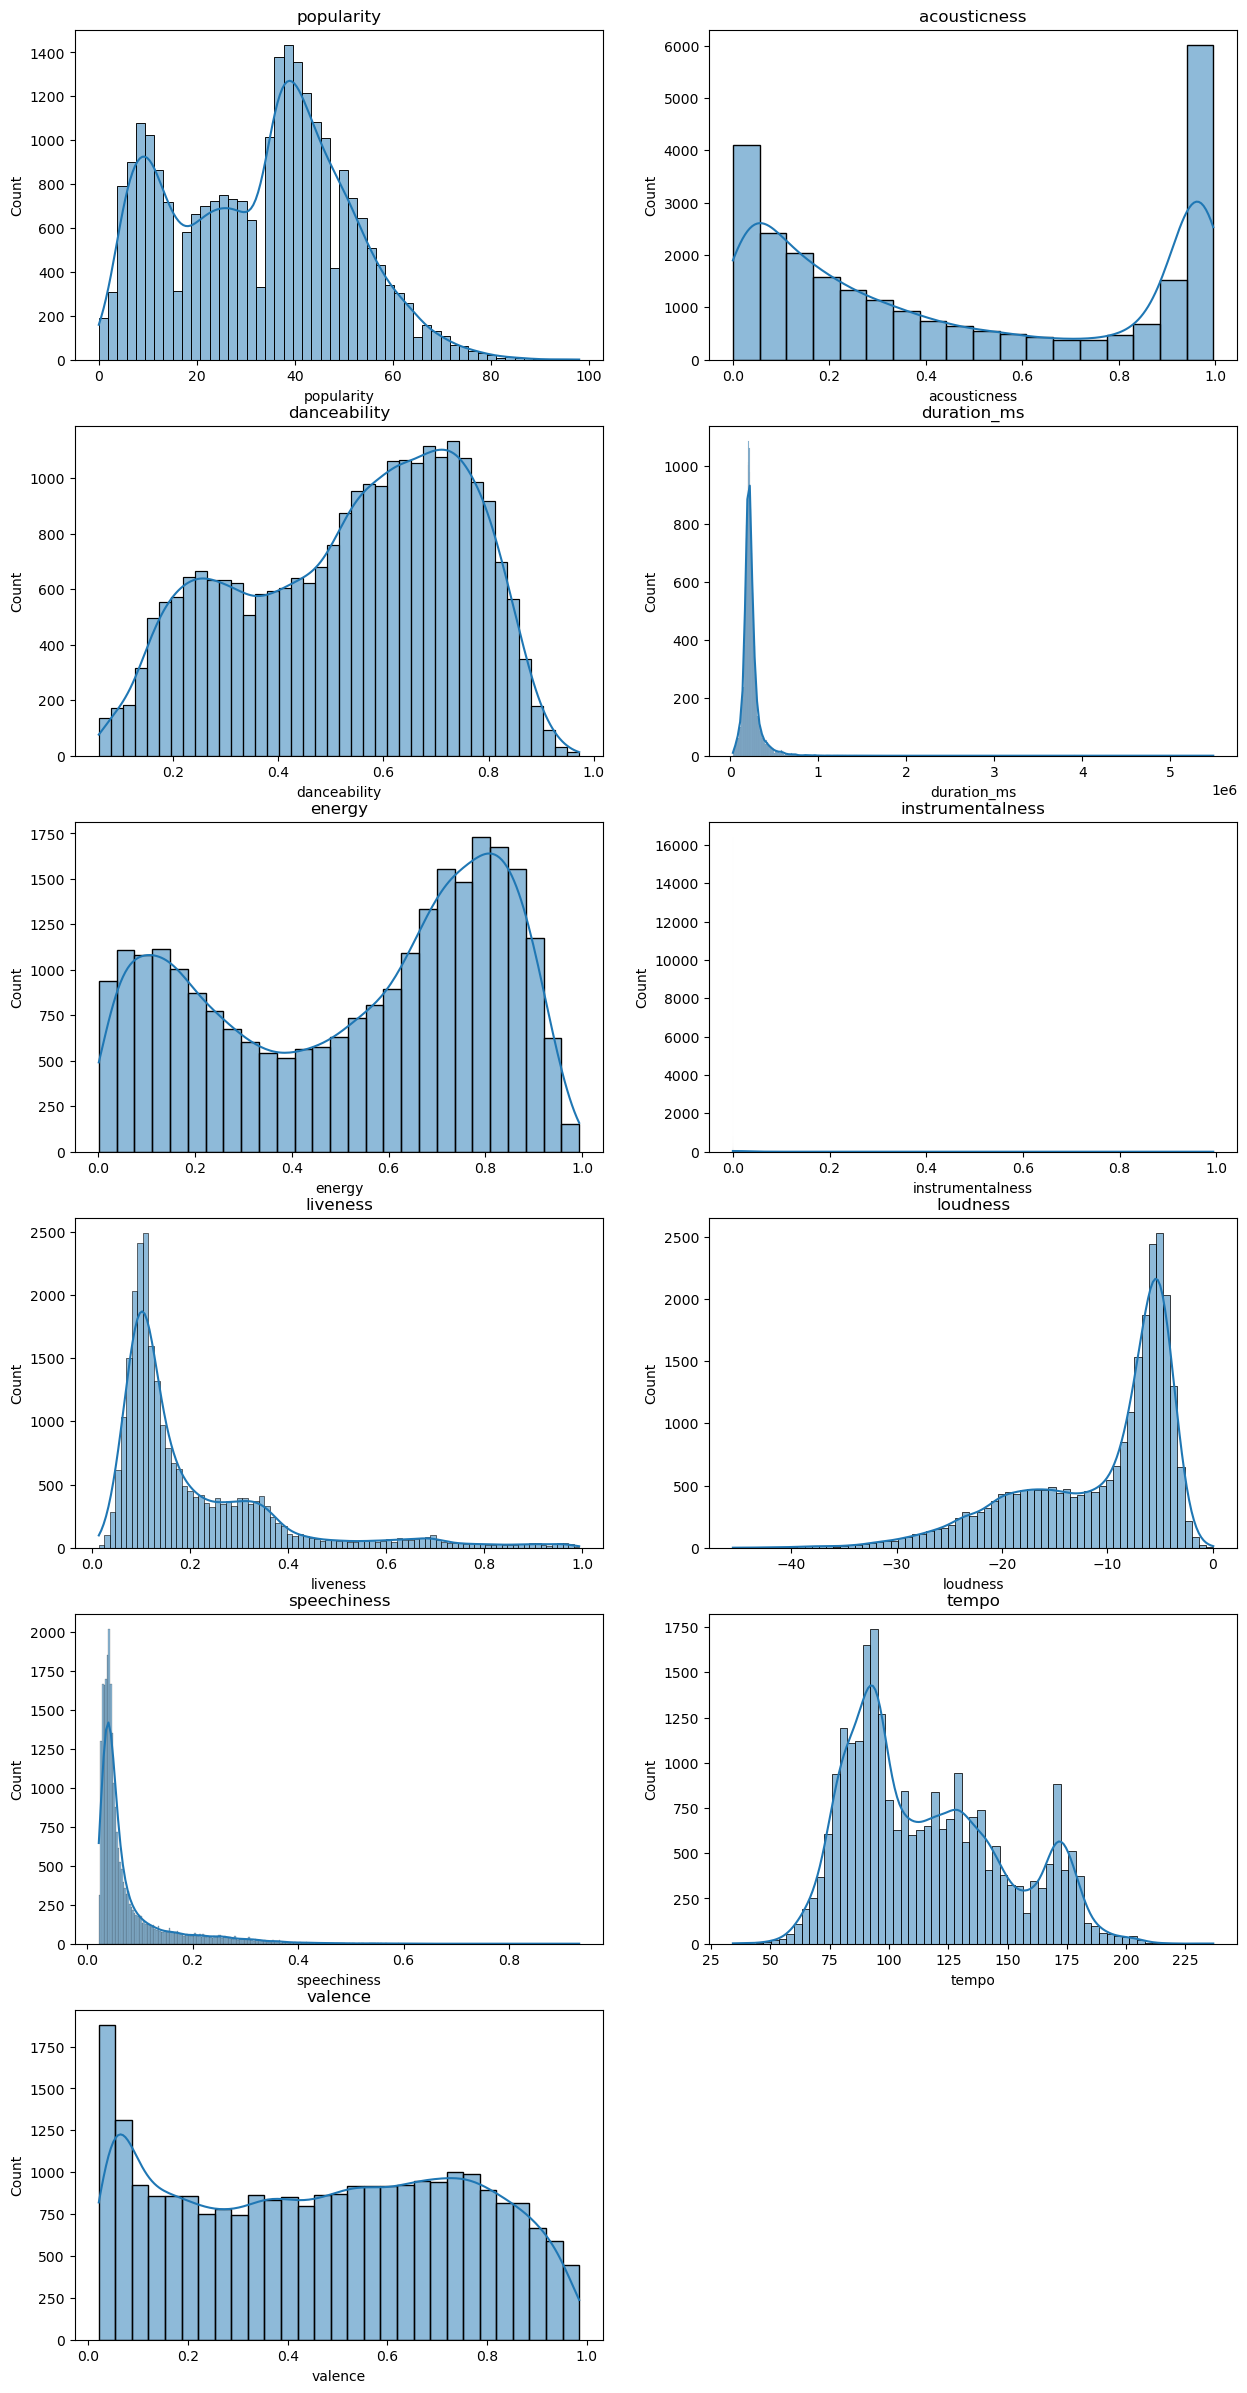

In [34]:
# Sélectionner uniquement les colonnes numériques pour les histogrammes
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Calculer le nombre de colonnes numériques et le nombre de lignes pour la grille
num_cols = len(numeric_columns)
num_rows = num_cols // 2 if num_cols % 2 == 0 else num_cols // 2 + 1

# Créer une figure avec une grille de sous-graphiques
plt.figure(figsize=(15, num_rows * 5))

# Créer un histogramme pour chaque colonne numérique
for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, 2, i + 1)
    sns.histplot(df_cleaned[column].dropna(), kde=True)  # Ajout de kde pour une courbe de densité
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Count')

In [35]:
# Ajuster l'espacement pour éviter le chevauchement
plt.tight_layout()

# Afficher les graphiques
plt.show()

<Figure size 640x480 with 0 Axes>

In [36]:
df.describe()

popularity  acousticness  danceability   duration_ms        energy  \
count  25871.000000  25871.000000  25871.000000  2.587100e+04  25871.000000   
mean      32.730238      0.468531      0.538595  2.357619e+05      0.525508   
std       17.519704      0.377846      0.210392  1.102547e+05      0.292107   
min        0.000000      0.000010      0.059200  3.070700e+04      0.000909   
25%       17.000000      0.109000      0.368000  1.877330e+05      0.235000   
50%       35.000000      0.351000      0.572000  2.179600e+05      0.604000   
75%       45.000000      0.928000      0.712000  2.564400e+05      0.784000   
max       98.000000      0.996000      0.972000  5.488000e+06      0.994000   

       instrumentalness      liveness      loudness   speechiness  \
count      25871.000000  25813.000000  25871.000000  25871.000000   
mean           0.077399      0.205897    -10.675907      0.079554   
std            0.225401      0.173816      7.138061      0.078753   
min            0.000000      0.014300    -45.539000      0.022300   
25%            0.000000      0.097400    -15.419000      0.037000   
50%            0.000008      0.134000     -7.541000      0.048000   
75%            0.001820      0.265000     -5.274000      0.081700   
max            0.994000      0.994000      0.070000      0.933000   

              tempo       valence  
count  25871.000000  25871.000000  
mean     115.660263      0.467532  
std       32.749104      0.280511  
min       34.151000      0.020700  
25%       89.981000      0.212000  
50%      108.053000      0.476000  
75%      138.027000      0.710000  
max      236.735000      0.985000

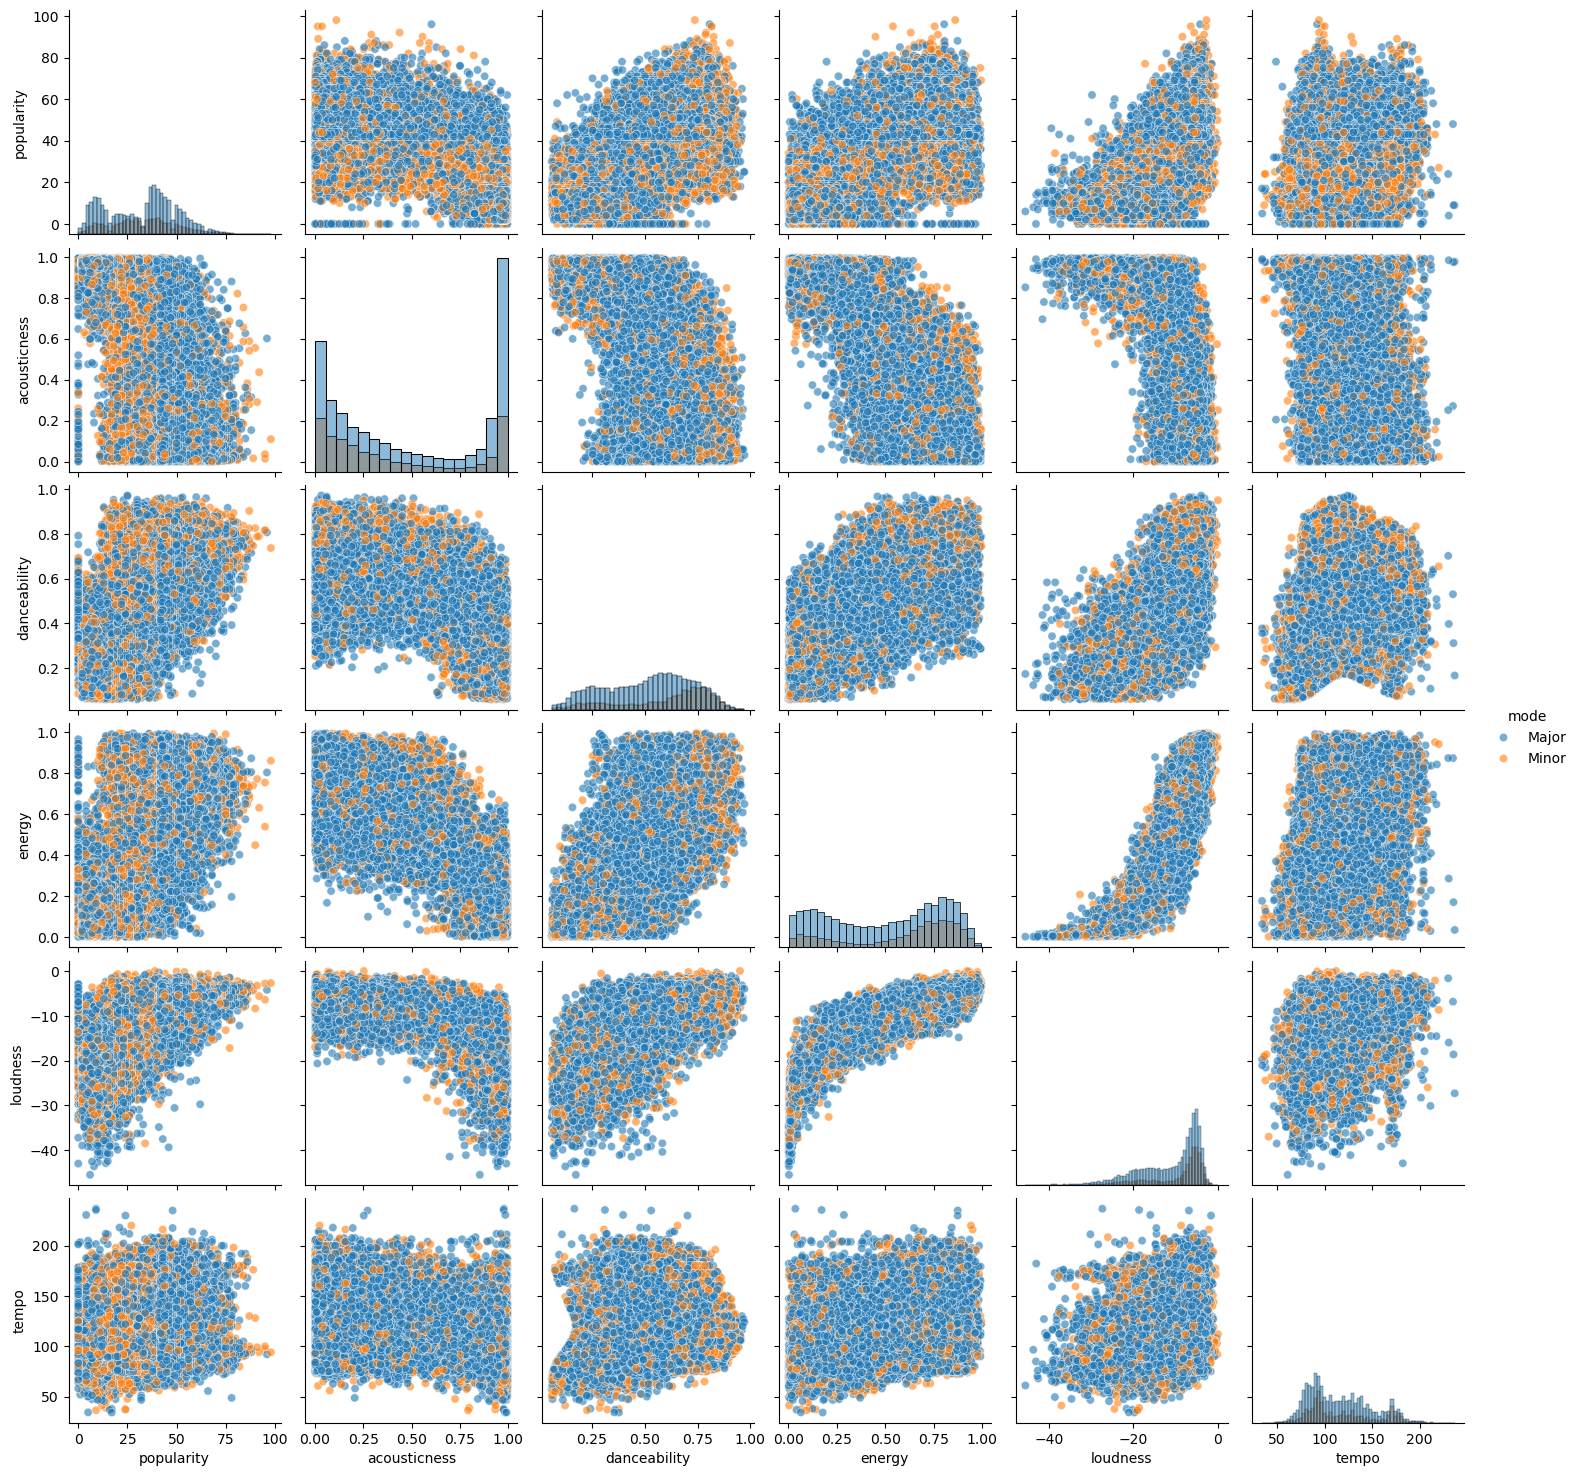

In [37]:
# Sélectionner un sous-ensemble de colonnes numériques pour le pairplot
numeric_columns = ['popularity', 'acousticness', 'danceability', 'energy', 'loudness', 'tempo']

# Ajouter une colonne catégorique pour la coloration (par exemple, 'mode')
selected_columns = numeric_columns + ['mode']

# Créer un pairplot avec les colonnes sélectionnées
sns.pairplot(df_cleaned[selected_columns], hue='mode', diag_kind='hist', plot_kws={'alpha': 0.6})

# Afficher le graphique
plt.show()

In [38]:
# Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=[np.number])

# Calculer la corrélation de Spearman
correlation_spearman = df_numeric.corr(method='spearman')

# Afficher le résultat
correlation_spearman

popularity  acousticness  danceability  duration_ms  \
popularity          1.000000     -0.599176      0.512209    -0.044116   
acousticness       -0.599176      1.000000     -0.638903     0.065432   
danceability        0.512209     -0.638903      1.000000    -0.104714   
duration_ms        -0.044116      0.065432     -0.104714     1.000000   
energy              0.543580     -0.780707      0.673425    -0.061534   
instrumentalness   -0.454146      0.496592     -0.528970     0.071744   
liveness           -0.074333      0.007247     -0.040562    -0.043070   
loudness            0.588447     -0.733378      0.646138    -0.045834   
speechiness        -0.116536     -0.068215      0.319255     0.008144   
tempo               0.255217     -0.293071      0.197657    -0.031095   
valence             0.461873     -0.593847      0.713935    -0.192424   

                    energy  instrumentalness  liveness  loudness  speechiness  \
popularity        0.543580         -0.454146 -0.074333  0.588447    -0.116536   
acousticness     -0.780707          0.496592  0.007247 -0.733378    -0.068215   
danceability      0.673425         -0.528970 -0.040562  0.646138     0.319255   
duration_ms      -0.061534          0.071744 -0.043070 -0.045834     0.008144   
energy            1.000000         -0.519850  0.058154  0.890246     0.211207   
instrumentalness -0.519850          1.000000 -0.030975 -0.570280    -0.182439   
liveness          0.058154         -0.030975  1.000000  0.010916     0.112108   
loudness          0.890246         -0.570280  0.010916  1.000000     0.133121   
speechiness       0.211207         -0.182439  0.112108  0.133121     1.000000   
tempo             0.286000         -0.223810 -0.011241  0.289019     0.053581   
valence           0.733878         -0.456404  0.016159  0.627897     0.177585   

                     tempo   valence  
popularity        0.255217  0.461873  
acousticness     -0.293071 -0.593847  
danceability      0.197657  0.713935  
duration_ms      -0.031095 -0.192424  
energy            0.286000  0.733878  
instrumentalness -0.223810 -0.456404  
liveness         -0.011241  0.016159  
loudness          0.289019  0.627897  
speechiness       0.053581  0.177585  
tempo             1.000000  0.262203  
valence           0.262203  1.000000

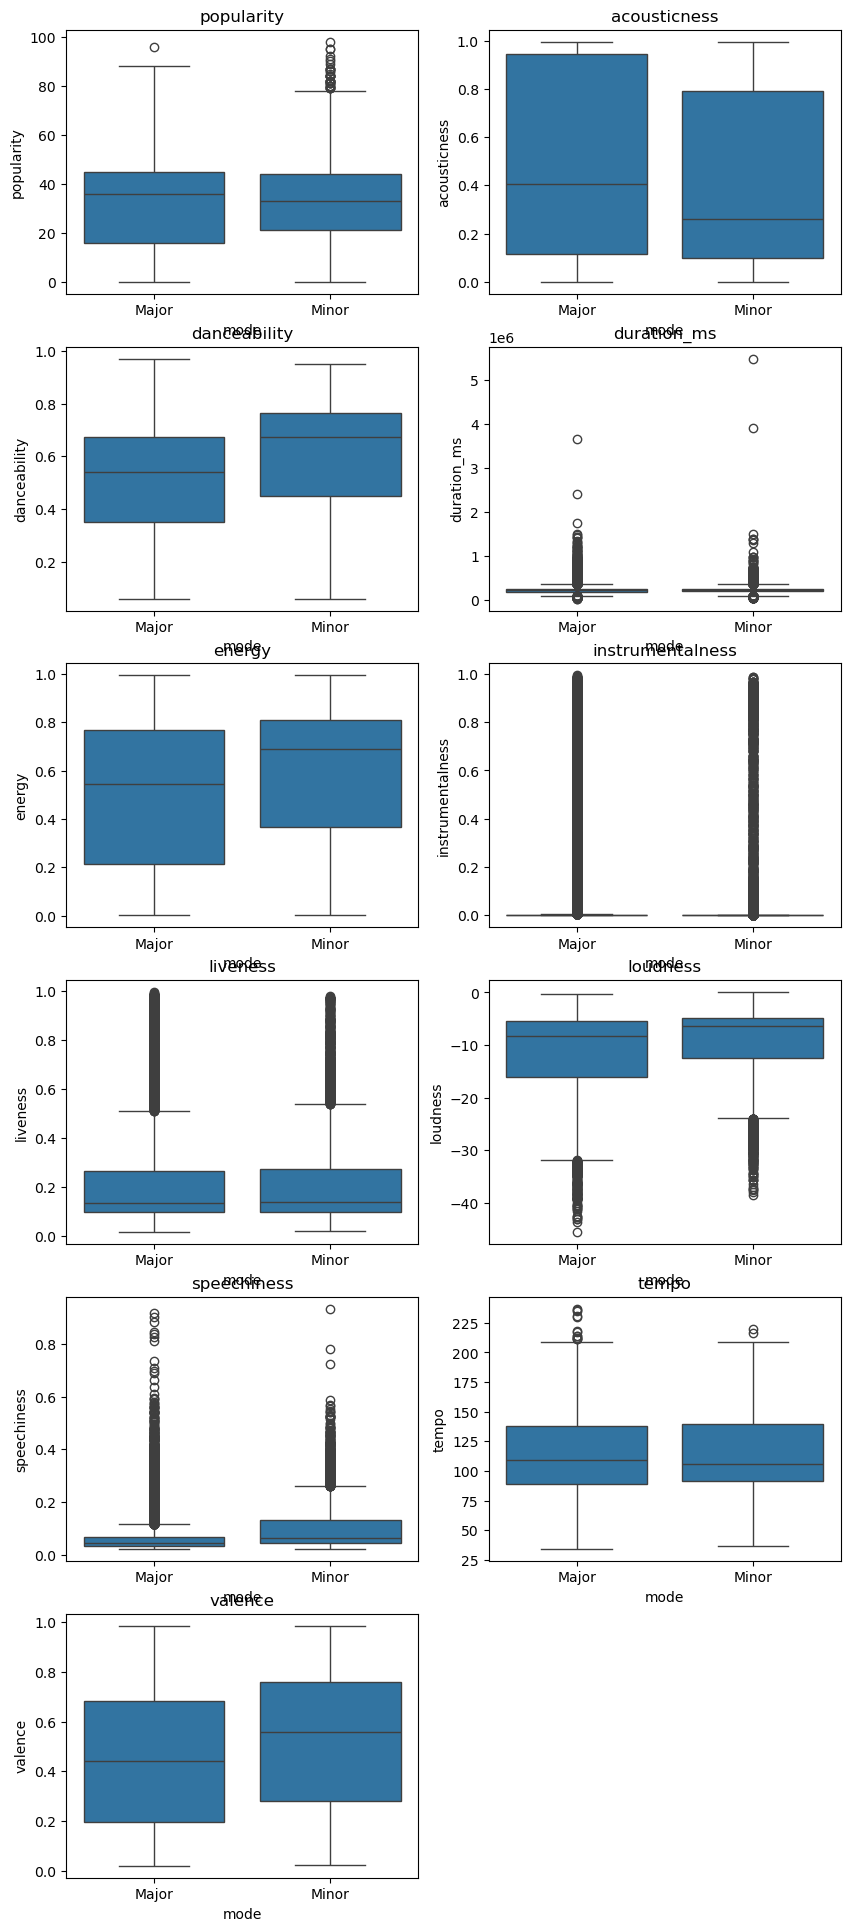

In [40]:
# Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=[np.number])

# Ajouter la colonne catégorique 'mode' aux données numériques
# 'mode' (Major ou Minor) est utilisée comme équivalent de 'status_type'
df_numeric['mode'] = df['mode']

# Créer un boxplot pour chaque colonne numérique en fonction de 'mode'
num_cols = len(df_numeric.columns) - 1  # -1 pour exclure 'mode'

# Nombre de lignes pour les sous-graphiques
num_rows = num_cols // 2
if num_cols % 2:
    num_rows += 1

plt.figure(figsize=(10, 4 * num_rows))
for i, column in enumerate(df_numeric.columns.drop('mode'), start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x='mode', y=column, data=df_numeric)
    plt.title(column)

In [41]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Vérification des valeurs manquantes avant nettoyage :
genre                0
artist_name          0
track_name           0
track_id             0
popularity           0
acousticness         0
danceability         0
duration_ms          0
energy               0
instrumentalness     0
key                  0
liveness            58
loudness             0
mode                 0
speechiness          0
tempo                0
time_signature       0
valence              0
dtype: int64

Vérification des valeurs manquantes après dropna :
genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Vérification des valeurs manquantes dans les colonnes num

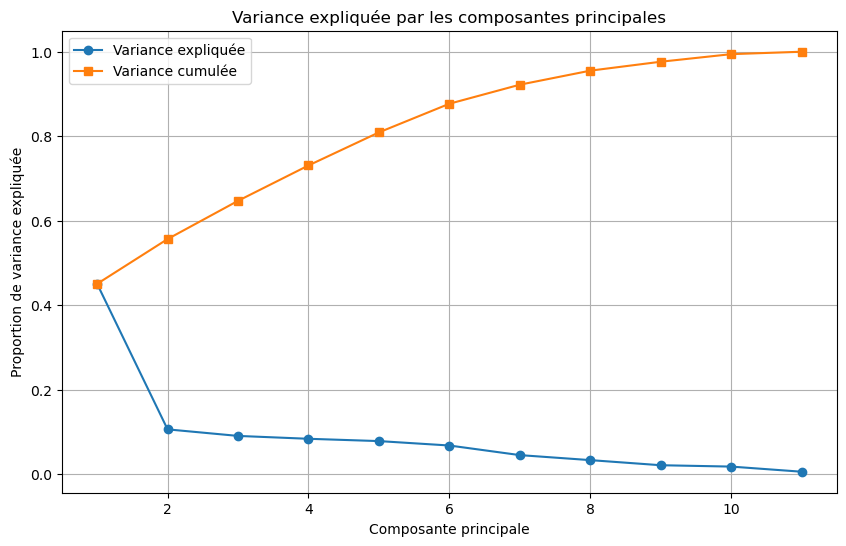

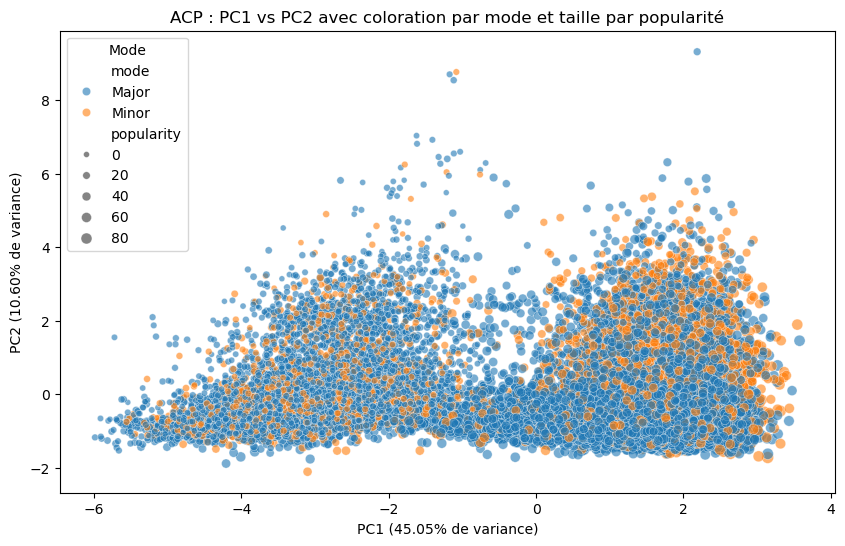


Contribution des variables originales aux composantes principales :
      popularity  acousticness  danceability  duration_ms    energy  \
PC1     0.329784     -0.401622      0.388692    -0.101665  0.418470   
PC2    -0.266114      0.079484      0.058968    -0.041274  0.010512   
PC3     0.036324     -0.091577     -0.008056     0.925508  0.083068   
PC4    -0.072719      0.057359     -0.103619    -0.193902 -0.074283   
PC5     0.144998     -0.047028     -0.238752     0.172418  0.066498   
PC6    -0.061042     -0.092555      0.053401    -0.131840  0.161324   
PC7     0.722211     -0.091454     -0.149147    -0.167477 -0.082952   
PC8     0.485541      0.319109      0.288531     0.135377 -0.349559   
PC9    -0.161178     -0.469680      0.636822     0.016394 -0.201106   
PC10   -0.037732      0.615114      0.501350     0.006447 -0.066418   
PC11    0.065784      0.317440      0.111335    -0.001729  0.779730   

      instrumentalness  liveness  loudness  speechiness     tempo   valence  


In [49]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv('spotify.csv')

# Vérifier la présence de valeurs manquantes dans le DataFrame initial
print("Vérification des valeurs manquantes avant nettoyage :")
print(df.isna().sum())

# Supprimer les lignes avec des données manquantes
df = df.dropna()

# Vérifier à nouveau après dropna pour confirmer l'absence de NaN
print("\nVérification des valeurs manquantes après dropna :")
print(df.isna().sum())

# Définir 'track_id' comme index pour une identification unique des pistes
df = df.set_index('track_id')

# Sélectionner uniquement les colonnes numériques
# Colonnes numériques dans spotify.csv : popularity, acousticness, danceability, duration_ms, energy,
# instrumentalness, liveness, loudness, speechiness, tempo, valence
df_numeric = df.select_dtypes(include=[np.number])

# Vérifier les valeurs manquantes dans df_numeric
print("\nVérification des valeurs manquantes dans les colonnes numériques :")
print(df_numeric.isna().sum())

# S'assurer qu'il n'y a pas de NaN dans df_numeric
if df_numeric.isna().any().any():
    raise ValueError("Des valeurs NaN sont présentes dans les colonnes numériques. Veuillez vérifier les données.")

# Normaliser les données avec StandardScaler
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_numeric)

# Vérifier que df_normalized ne contient pas de NaN
if np.any(np.isnan(df_normalized)):
    raise ValueError("Des valeurs NaN sont présentes dans les données normalisées. Veuillez vérifier les données.")

# Appliquer l'ACP (PCA)
pca = PCA()
df_pca = pca.fit_transform(df_normalized)

# Créer un DataFrame pour les composantes principales
pca_columns = [f'PC{i+1}' for i in range(df_pca.shape[1])]
df_pca = pd.DataFrame(df_pca, index=df_numeric.index, columns=pca_columns)

# Afficher les premières lignes du DataFrame après ACP
print("\nAperçu des données après ACP :")
print(df_pca.head())

# Calculer la variance expliquée par chaque composante principale
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Visualisation : Variance expliquée par les composantes principales
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', label='Variance expliquée')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='s', label='Variance cumulée')
plt.xlabel('Composante principale')
plt.ylabel('Proportion de variance expliquée')
plt.title('Variance expliquée par les composantes principales')
plt.legend()
plt.grid(True)
plt.show()

# Visualisation : Scatter plot des deux premières composantes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca, hue=df['mode'], size=df['popularity'], alpha=0.6)
plt.title('ACP : PC1 vs PC2 avec coloration par mode et taille par popularité')
plt.xlabel(f'PC1 ({explained_variance_ratio[0]*100:.2f}% de variance)')
plt.ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}% de variance)')
plt.legend(title='Mode')
plt.show()

# Afficher la contribution des variables originales à chaque composante principale
components = pd.DataFrame(pca.components_, columns=df_numeric.columns, index=pca_columns)
print("\nContribution des variables originales aux composantes principales :")
print(components)

In [50]:
# Afficher la contribution des variables originales à chaque composante principale
components = pd.DataFrame(pca.components_, columns=df_numeric.columns, index=pca_columns)
print("\nContribution des variables originales aux composantes principales :")
print(components)


Contribution des variables originales aux composantes principales :
      popularity  acousticness  danceability  duration_ms    energy  \
PC1     0.329784     -0.401622      0.388692    -0.101665  0.418470   
PC2    -0.266114      0.079484      0.058968    -0.041274  0.010512   
PC3     0.036324     -0.091577     -0.008056     0.925508  0.083068   
PC4    -0.072719      0.057359     -0.103619    -0.193902 -0.074283   
PC5     0.144998     -0.047028     -0.238752     0.172418  0.066498   
PC6    -0.061042     -0.092555      0.053401    -0.131840  0.161324   
PC7     0.722211     -0.091454     -0.149147    -0.167477 -0.082952   
PC8     0.485541      0.319109      0.288531     0.135377 -0.349559   
PC9    -0.161178     -0.469680      0.636822     0.016394 -0.201106   
PC10   -0.037732      0.615114      0.501350     0.006447 -0.066418   
PC11    0.065784      0.317440      0.111335    -0.001729  0.779730   

      instrumentalness  liveness  loudness  speechiness     tempo   valence  


Vérification des valeurs manquantes avant nettoyage :
genre                0
artist_name          0
track_name           0
track_id             0
popularity           0
acousticness         0
danceability         0
duration_ms          0
energy               0
instrumentalness     0
key                  0
liveness            58
loudness             0
mode                 0
speechiness          0
tempo                0
time_signature       0
valence              0
dtype: int64

Vérification des valeurs manquantes après dropna :
genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Vérification des valeurs manquantes dans les colonnes num

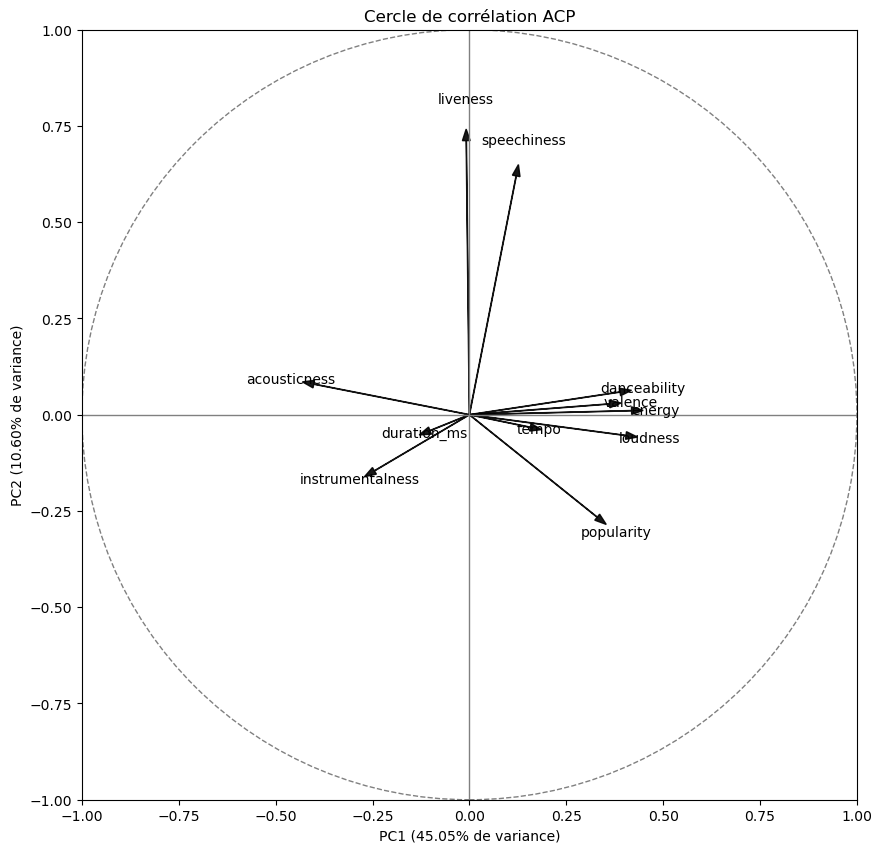


Contribution des variables originales aux deux premières composantes principales :
     popularity  acousticness  danceability  duration_ms    energy  \
PC1    0.329784     -0.401622      0.388692    -0.101665  0.418470   
PC2   -0.266114      0.079484      0.058968    -0.041274  0.010512   

     instrumentalness  liveness  loudness  speechiness     tempo   valence  
PC1         -0.245109 -0.007981  0.404027     0.120791  0.157082  0.361612  
PC2         -0.145778  0.711923 -0.053978     0.620262 -0.032635  0.028015  


In [51]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv('spotify.csv')

# Vérifier la présence de valeurs manquantes dans le DataFrame initial
print("Vérification des valeurs manquantes avant nettoyage :")
print(df.isna().sum())

# Supprimer les lignes avec des données manquantes
df = df.dropna()

# Vérifier à nouveau après dropna pour confirmer l'absence de NaN
print("\nVérification des valeurs manquantes après dropna :")
print(df.isna().sum())

# Définir 'track_id' comme index pour une identification unique des pistes
df = df.set_index('track_id')

# Sélectionner uniquement les colonnes numériques
# Colonnes numériques dans spotify.csv : popularity, acousticness, danceability, duration_ms, energy,
# instrumentalness, liveness, loudness, speechiness, tempo, valence
df_numeric = df.select_dtypes(include=[np.number])

# Vérifier les valeurs manquantes dans df_numeric
print("\nVérification des valeurs manquantes dans les colonnes numériques :")
print(df_numeric.isna().sum())

# S'assurer qu'il n'y a pas de NaN dans df_numeric
if df_numeric.isna().any().any():
    raise ValueError("Des valeurs NaN sont présentes dans les colonnes numériques. Veuillez vérifier les données.")

# Normaliser les données avec StandardScaler
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_numeric)

# Vérifier que df_normalized ne contient pas de NaN
if np.any(np.isnan(df_normalized)):
    raise ValueError("Des valeurs NaN sont présentes dans les données normalisées. Veuillez vérifier les données.")

# Appliquer l'ACP (PCA)
pca = PCA()
df_pca = pca.fit_transform(df_normalized)

# Créer le cercle de corrélation pour PC1 et PC2
coeff = np.transpose(pca.components_[0:2, :])  # Coefficients des deux premières composantes
n = coeff.shape[0]  # Nombre de variables
xs = np.array([1, 0])  # Vecteur pour l'axe x
ys = np.array([0, 1])  # Vecteur pour l'axe y

# Créer la figure du cercle de corrélation
plt.figure(figsize=(10, 10))

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, df_numeric.columns[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% de variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% de variance)')
plt.title('Cercle de corrélation ACP')

# Afficher la figure
plt.show()

# Afficher la contribution des variables originales à PC1 et PC2
components = pd.DataFrame(pca.components_[0:2, :], columns=df_numeric.columns, index=['PC1', 'PC2'])
print("\nContribution des variables originales aux deux premières composantes principales :")
print(components)

Vérification des valeurs manquantes avant nettoyage :
genre                0
artist_name          0
track_name           0
track_id             0
popularity           0
acousticness         0
danceability         0
duration_ms          0
energy               0
instrumentalness     0
key                  0
liveness            58
loudness             0
mode                 0
speechiness          0
tempo                0
time_signature       0
valence              0
dtype: int64

Vérification des valeurs manquantes après dropna :
genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Vérification des valeurs manquantes dans les colonnes num

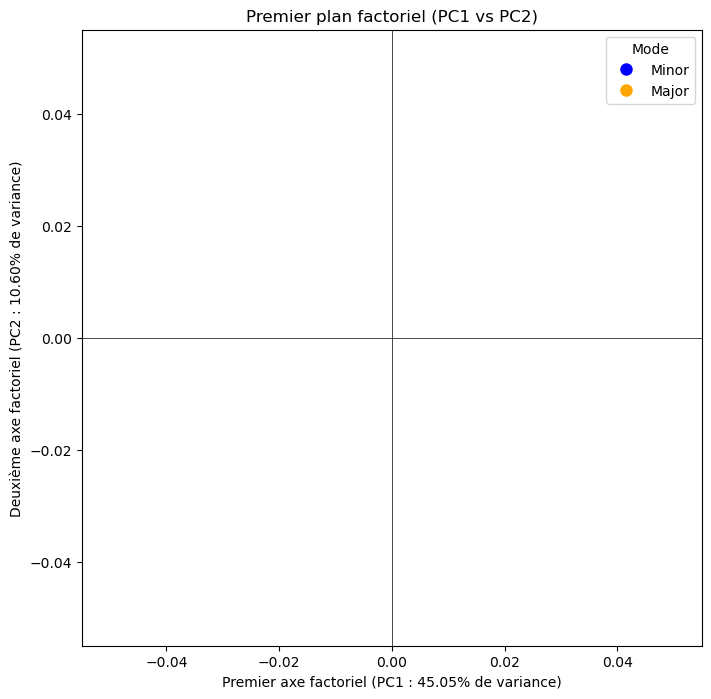

In [52]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv('spotify.csv')

# Vérifier la présence de valeurs manquantes dans le DataFrame initial
print("Vérification des valeurs manquantes avant nettoyage :")
print(df.isna().sum())

# Supprimer les lignes avec des données manquantes
df = df.dropna()

# Vérifier à nouveau après dropna pour confirmer l'absence de NaN
print("\nVérification des valeurs manquantes après dropna :")
print(df.isna().sum())

# Définir 'track_id' comme index pour une identification unique des pistes
df = df.set_index('track_id')

# Sélectionner uniquement les colonnes numériques
# Colonnes numériques dans spotify.csv : popularity, acousticness, danceability, duration_ms, energy,
# instrumentalness, liveness, loudness, speechiness, tempo, valence
df_numeric = df.select_dtypes(include=[np.number])

# Vérifier les valeurs manquantes dans df_numeric
print("\nVérification des valeurs manquantes dans les colonnes numériques :")
print(df_numeric.isna().sum())

# S'assurer qu'il n'y a pas de NaN dans df_numeric
if df_numeric.isna().any().any():
    raise ValueError("Des valeurs NaN sont présentes dans les colonnes numériques. Veuillez vérifier les données.")

# Normaliser les données avec StandardScaler
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_numeric)

# Vérifier que df_normalized ne contient pas de NaN
if np.any(np.isnan(df_normalized)):
    raise ValueError("Des valeurs NaN sont présentes dans les données normalisées. Veuillez vérifier les données.")

# Appliquer l'ACP (PCA)
pca = PCA()
df_pca = pca.fit_transform(df_normalized)

# Premier plan factoriel
fig, ax = plt.subplots(figsize=(8, 8))
# Scatter plot des deux premières composantes principales (PC1 et PC2)
# Utiliser 'mode' pour la coloration au lieu de 'status_type'
scatter = ax.scatter(df_pca[:, 0], df_pca[:, 1], c=df['mode'].map({0: 'blue', 1: 'orange'}), alpha=0.5)

# Ajouter une légende pour 'mode'
legend_labels = {0: 'Minor', 1: 'Major'}
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Minor'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Major')]
ax.legend(handles=handles, title='Mode')

# Ajouter des axes
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)

# Labels des axes avec pourcentage de variance expliquée
ax.set_xlabel(f'Premier axe factoriel (PC1 : {pca.explained_variance_ratio_[0]*100:.2f}% de variance)')
ax.set_ylabel(f'Deuxième axe factoriel (PC2 : {pca.explained_variance_ratio_[1]*100:.2f}% de variance)')

# Titre du graphique
plt.title('Premier plan factoriel (PC1 vs PC2)')

# Afficher le graphique
plt.show()

Vérification des valeurs manquantes avant nettoyage :
genre                0
artist_name          0
track_name           0
track_id             0
popularity           0
acousticness         0
danceability         0
duration_ms          0
energy               0
instrumentalness     0
key                  0
liveness            58
loudness             0
mode                 0
speechiness          0
tempo                0
time_signature       0
valence              0
dtype: int64

Vérification des valeurs manquantes après dropna :
genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Vérification des valeurs manquantes dans les colonnes num

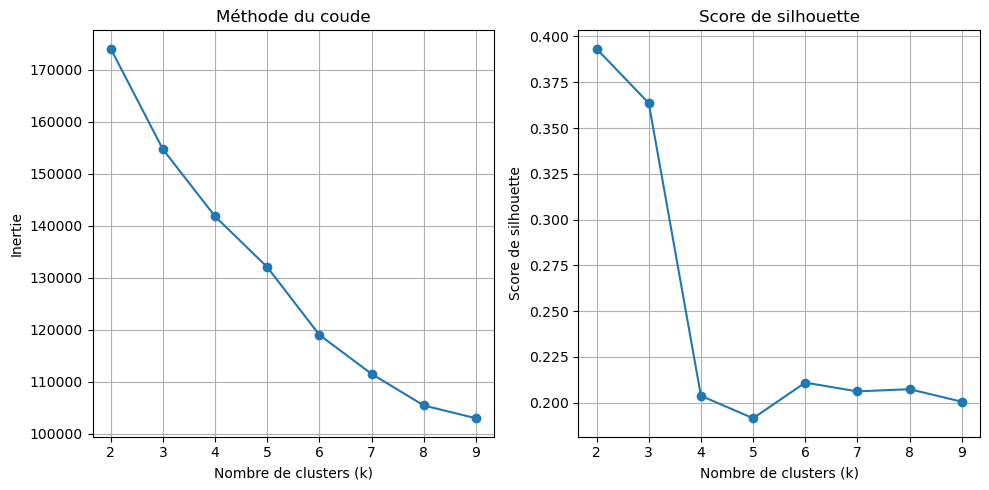


Scores de silhouette pour chaque nombre de clusters :
k=2: Score de silhouette = 0.3933
k=3: Score de silhouette = 0.3636
k=4: Score de silhouette = 0.2038
k=5: Score de silhouette = 0.1916
k=6: Score de silhouette = 0.2110
k=7: Score de silhouette = 0.2062
k=8: Score de silhouette = 0.2074
k=9: Score de silhouette = 0.2006

Nombre optimal de clusters (basé sur le score de silhouette) : 2


In [56]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv('spotify.csv')

# Vérifier la présence de valeurs manquantes dans le DataFrame initial
print("Vérification des valeurs manquantes avant nettoyage :")
print(df.isna().sum())

# Supprimer les lignes avec des données manquantes
df = df.dropna()

# Vérifier à nouveau après dropna pour confirmer l'absence de NaN
print("\nVérification des valeurs manquantes après dropna :")
print(df.isna().sum())

# Définir 'track_id' comme index pour une identification unique des pistes
df = df.set_index('track_id')

# Sélectionner uniquement les colonnes numériques
# Colonnes numériques dans spotify.csv : popularity, acousticness, danceability, duration_ms, energy,
# instrumentalness, liveness, loudness, speechiness, tempo, valence
df_numeric = df.select_dtypes(include=[np.number])

# Vérifier les valeurs manquantes dans df_numeric
print("\nVérification des valeurs manquantes dans les colonnes numériques :")
print(df_numeric.isna().sum())

# S'assurer qu'il n'y a pas de NaN dans df_numeric
if df_numeric.isna().any().any():
    raise ValueError("Des valeurs NaN sont présentes dans les colonnes numériques. Veuillez vérifier les données.")

# Normaliser les données avec StandardScaler
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_numeric)

# Vérifier que df_normalized ne contient pas de NaN
if np.any(np.isnan(df_normalized)):
    raise ValueError("Des valeurs NaN sont présentes dans les données normalisées. Veuillez vérifier les données.")

# Choix du nombre optimal de clusters (méthode du coude et score de silhouette)
inertias = []
silhouettes = []
K = range(2, 10)  # Tester de 2 à 9 clusters

for k in K:
    # Instancier et entraîner le modèle KMeans
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(df_normalized)
    
    # Stocker l'inertie (somme des distances intra-cluster)
    inertias.append(kmeanModel.inertia_)
    
    # Calculer et stocker le score de silhouette
    silhouettes.append(silhouette_score(df_normalized, kmeanModel.labels_))

# Visualisation : Méthode du coude (inertie)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertias, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.grid(True)

# Visualisation : Score de silhouette
plt.subplot(1, 2, 2)
plt.plot(K, silhouettes, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette')
plt.grid(True)

plt.tight_layout()
plt.show()

# Afficher les scores de silhouette pour chaque k
print("\nScores de silhouette pour chaque nombre de clusters :")
for k, sil in zip(K, silhouettes):
    print(f"k={k}: Score de silhouette = {sil:.4f}")

# Identifier le nombre optimal de clusters basé sur le score de silhouette
optimal_k = K[np.argmax(silhouettes)]
print(f"\nNombre optimal de clusters (basé sur le score de silhouette) : {optimal_k}")

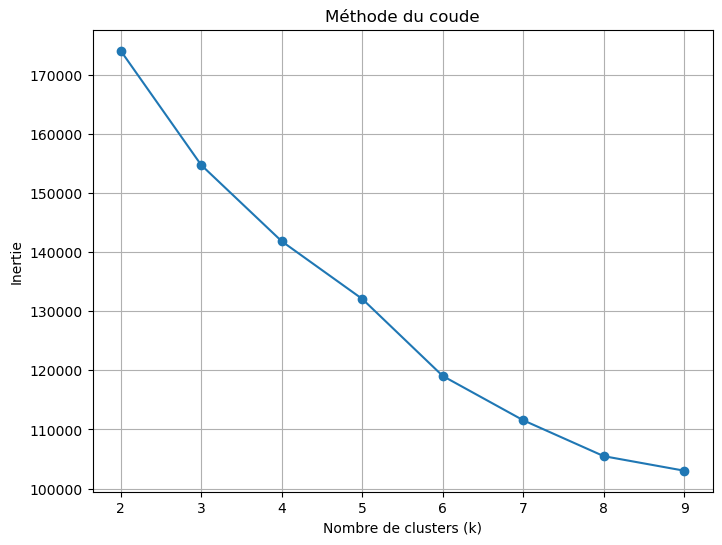

In [57]:
# Tracer la courbe de l'inertie
plt.figure(figsize=(8, 6))
plt.plot(K, inertias, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.grid(True)
plt.show()

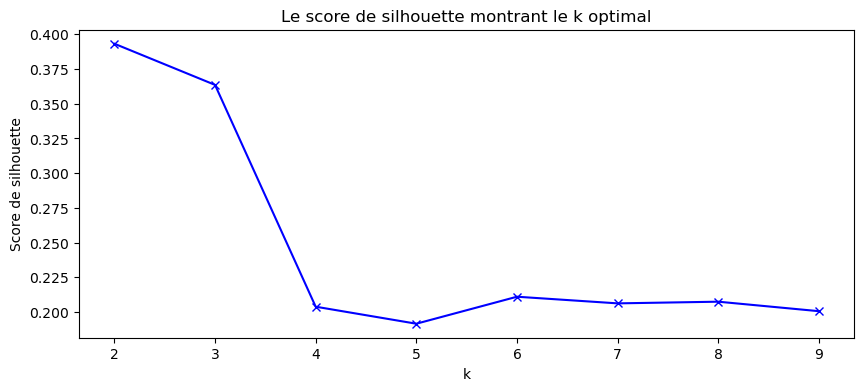

In [58]:
# Graphique du score de silhouette
plt.figure(figsize=(10,4))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('Score de silhouette')
plt.title('Le score de silhouette montrant le k optimal')
plt.show()


In [59]:
# Appliquer KMeans avec le nombre de clusters optimal trouvé (supposons que c'est 3 pour cet exemple)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_normalized)




KMeans(n_clusters=4, random_state=42)

In [60]:
# Ajouter les labels de cluster au DataFrame
df['cluster_label'] = kmeans.labels_
df

genre       artist_name  \
track_id                                            
5ICoYTFfmUKguBHpINKkGL  Country               Cam   
0rk6JE7ODyGWWquK4y7t1u  Country      Kevin Fowler   
3vMwtAfDNM8dDBWMvS78pn  Country      Roger Miller   
7IJlk42gDKt5dfSSLwtEsp  Country           M. Ward   
2JxSaSRavL82FCTCPzVmEf  Country       Chris Cagle   
...                         ...               ...   
7robBaDSeyFRaxT0QhBifa  Country       Johnny Cash   
2Xi6ImRr8RByoZ66r17SoA  Country      Bailey Bryan   
7utpHSZSjZY0u4OqeSNR9G  Country  Carrie Underwood   
2apAGfU02yKyFO3ZS8ni03  Country      Adam Calhoun   
6Zd6gSMyyjSybIw4lK9Ecy  Country    Linda Ronstadt   

                                                               track_name  \
track_id                                                                    
5ICoYTFfmUKguBHpINKkGL                                         My Mistake   
0rk6JE7ODyGWWquK4y7t1u                                          That Girl   
3vMwtAfDNM8dDBWMvS78pn                                         Chug-A-Lug   
7IJlk42gDKt5dfSSLwtEsp                                Chinese Translation   
2JxSaSRavL82FCTCPzVmEf                                  Anywhere But Here   
...                                                                   ...   
7robBaDSeyFRaxT0QhBifa                             Tennessee Flat-Top Box   
2Xi6ImRr8RByoZ66r17SoA                                           Songbird   
7utpHSZSjZY0u4OqeSNR9G                     Like I'll Never Love You Again   
2apAGfU02yKyFO3ZS8ni03                                              Sheep   
6Zd6gSMyyjSybIw4lK9Ecy  Somewhere Out There - From "An American Tail" ...   

                        popularity  acousticness  danceability  duration_ms  \
track_id                                                                      
5ICoYTFfmUKguBHpINKkGL          45       0.00821         0.551       200013   
0rk6JE7ODyGWWquK4y7t1u          42       0.02720         0.375       208187   
3vMwtAfDNM8dDBWMvS78pn          46       0.69000         0.699       123360   
7IJlk42gDKt5dfSSLwtEsp          54       0.15200         0.555       238600   
2JxSaSRavL82FCTCPzVmEf          42       0.57100         0.640       243000   
...                            ...           ...           ...          ...   
7robBaDSeyFRaxT0QhBifa          46       0.26100         0.659       179147   
2Xi6ImRr8RByoZ66r17SoA          44       0.77900         0.371       230400   
7utpHSZSjZY0u4OqeSNR9G          46       0.49400         0.487       216093   
2apAGfU02yKyFO3ZS8ni03          44       0.03720         0.793       179947   
6Zd6gSMyyjSybIw4lK9Ecy          50       0.83200         0.320       238173   

                        energy  instrumentalness key  liveness  loudness  \
track_id                                                                   
5ICoYTFfmUKguBHpINKkGL   0.704          0.000002  G#    0.2450    -5.426   
0rk6JE7ODyGWWquK4y7t1u   0.859          0.000000   G    0.2670    -3.243   
3vMwtAfDNM8dDBWMvS78pn   0.408          0.000219   B    0.1450   -11.460   
7IJlk42gDKt5dfSSLwtEsp   0.726          0.000178   D    0.1480    -8.939   
2JxSaSRavL82FCTCPzVmEf   0.478          0.000000   B    0.0902    -6.960   
...                        ...               ...  ..       ...       ...   
7robBaDSeyFRaxT0QhBifa   0.724          0.001760   F    0.3630    -8.175   
2Xi6ImRr8RByoZ66r17SoA   0.359          0.000000  C#    0.3310    -8.893   
7utpHSZSjZY0u4OqeSNR9G   0.536          0.000008  A#    0.1960    -6.115   
2apAGfU02yKyFO3ZS8ni03   0.834          0.000000   A    0.1110    -5.719   
6Zd6gSMyyjSybIw4lK9Ecy   0.222          0.000192   C    0.0972   -16.265   

                         mode  speechiness    tempo time_signature  valence  \
track_id                                                                      
5ICoYTFfmUKguBHpINKkGL  Major       0.0444   97.075            4/4    0.541   
0rk6JE7ODyGWWquK4y7t1u  Major       0.0569   74.059            4/4    0.597   
3

In [61]:
# Interprétation des groupes
# Afficher les statistiques des clusters
cluster_stats = df.groupby('cluster_label')[df_numeric.columns].mean()
cluster_stats


popularity  acousticness  danceability    duration_ms  \
cluster_label                                                          
0               14.045940      0.930055      0.252673  303971.288167   
1               43.055181      0.235065      0.606138  226440.688582   
2               15.073838      0.937324      0.316863  244334.038742   
3               41.048723      0.224281      0.696012  222278.198110   

                 energy  instrumentalness  liveness   loudness  speechiness  \
cluster_label                                                                 
0              0.152453          0.789330  0.165137 -20.737349     0.045415   
1              0.691347          0.003548  0.192892  -6.310920     0.099318   
2              0.179972          0.034765  0.240292 -18.427752     0.062823   
3              0.717140          0.004688  0.201030  -6.472029     0.084564   

                    tempo   valence  
cluster_label                        
0              101.552145  0.189950  
1              155.871885  0.562895  
2              102.197900  0.196114  
3              100.576131  0.637184

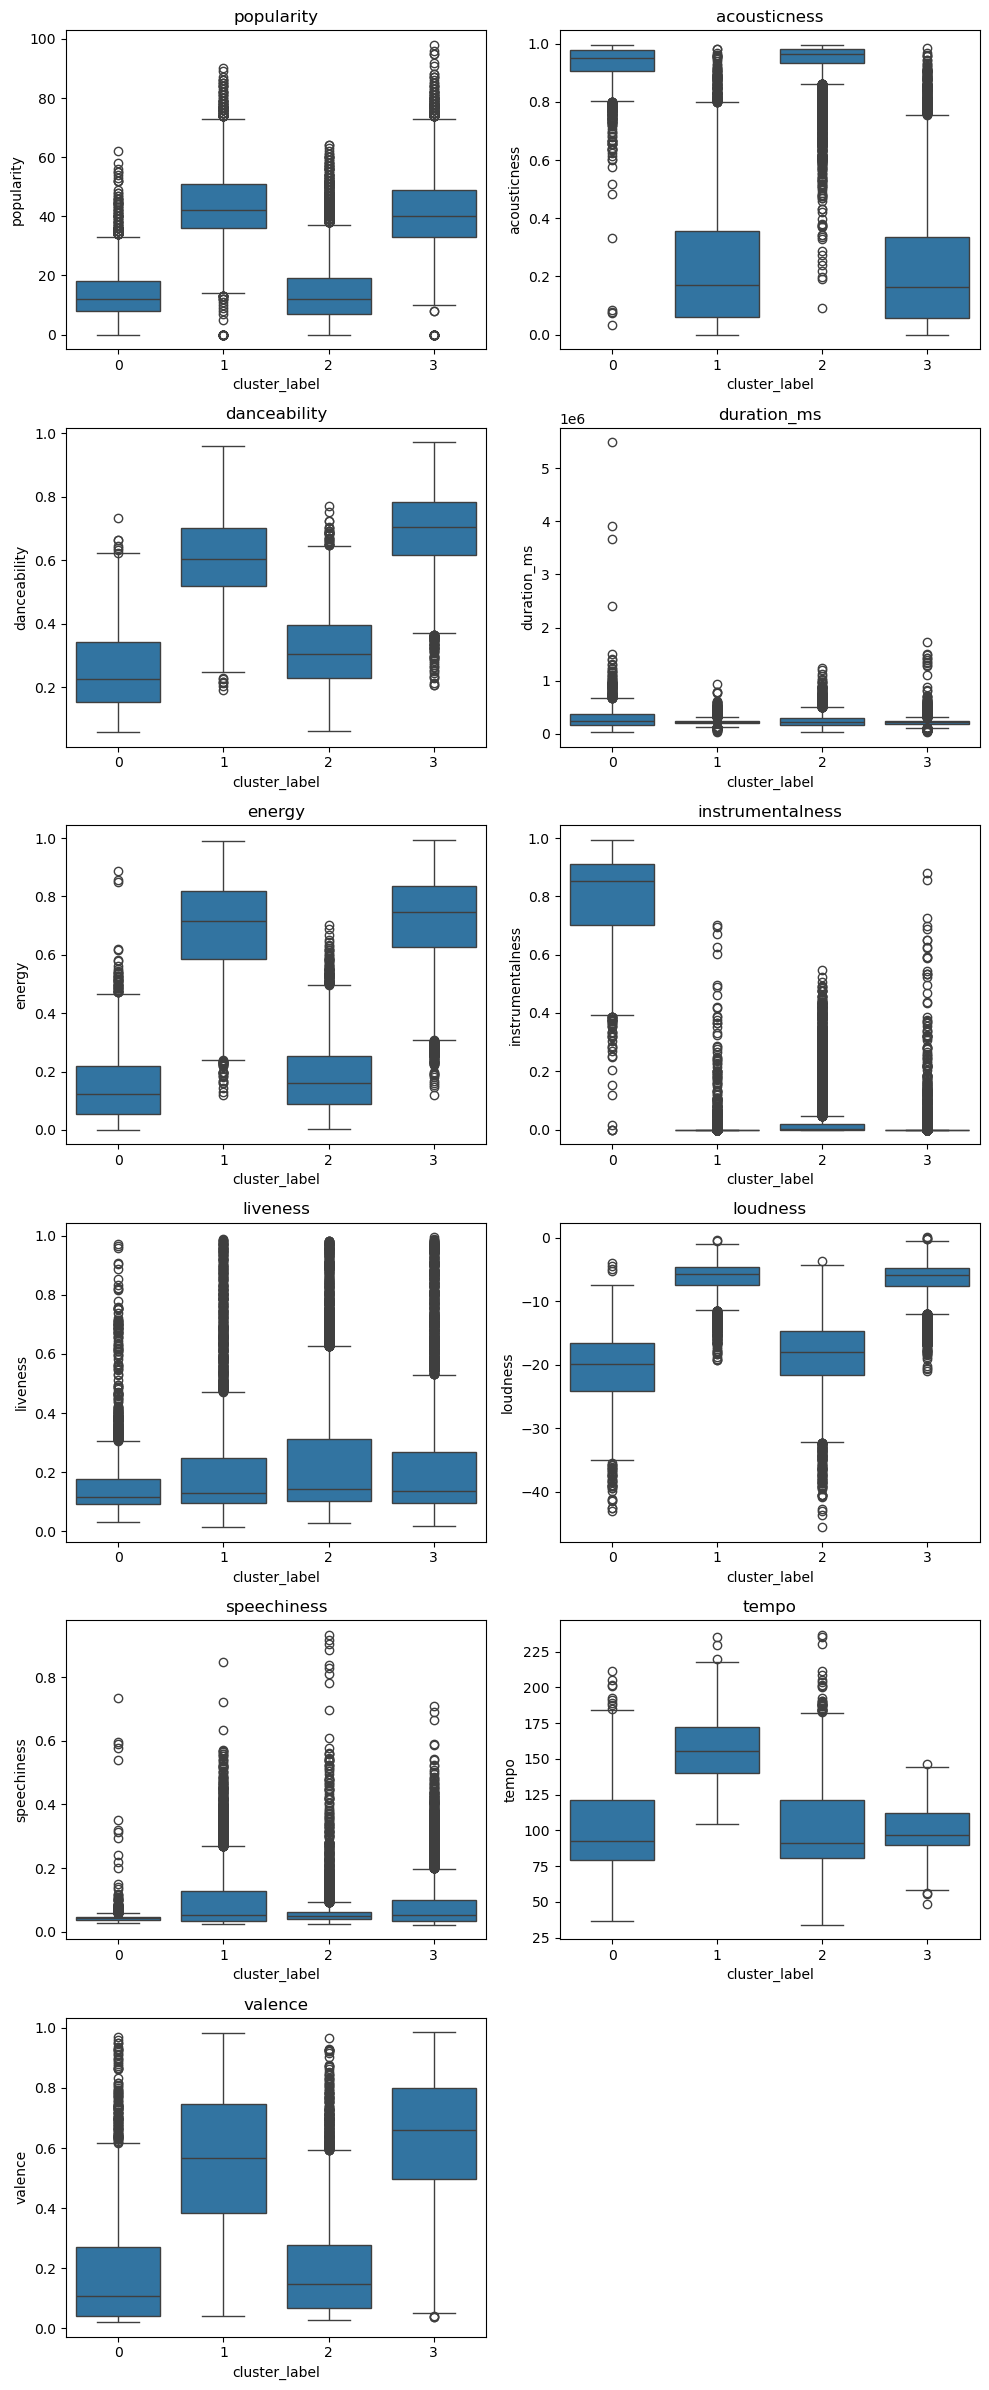

In [62]:
# Créer un boxplot pour chaque colonne numérique
num_cols = len(df_numeric.columns) # -1 pour exclure 'status_type'

# Nombre de lignes pour les sous-graphiques
num_rows = num_cols // 2
if num_cols % 2:
    num_rows += 1

plt.figure(figsize=(10, 4 * num_rows))
for i, column in enumerate(df_numeric.columns, start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x='cluster_label', y=column, data=df)
    plt.title(column)

plt.tight_layout()
plt.show()


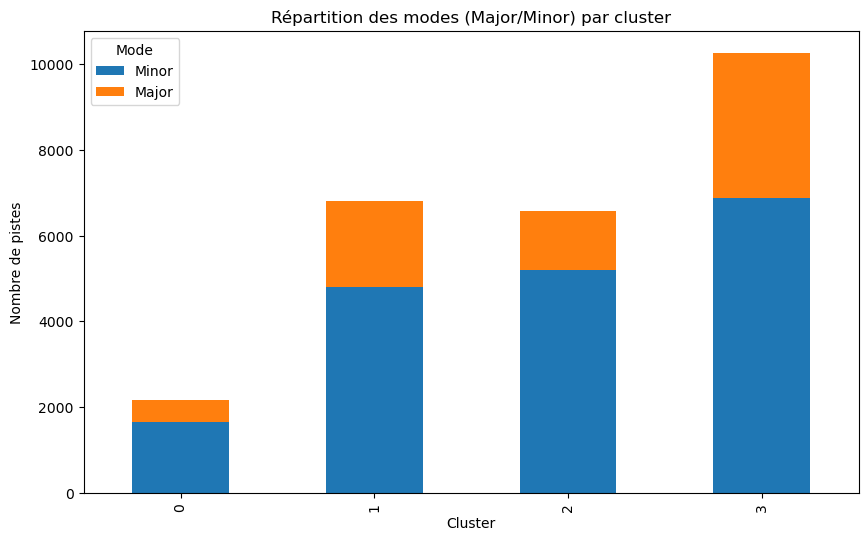


Tableau de contingence :
mode           Major  Minor
cluster_label              
0               1651    504
1               4801   2013
2               5189   1393
3               6873   3389


In [63]:
# Créer une table de contingence entre cluster_label et mode
contingency_table = pd.crosstab(df['cluster_label'], df['mode'])

# Tracer le barplot empilé
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Ajouter des étiquettes et des titres
plt.xlabel('Cluster')
plt.ylabel('Nombre de pistes')
plt.title('Répartition des modes (Major/Minor) par cluster')

# Afficher la légende
plt.legend(title='Mode', labels=['Minor', 'Major'])

# Afficher le graphique
plt.show()

# Afficher la table de contingence
print("\nTableau de contingence :")
print(contingency_table)

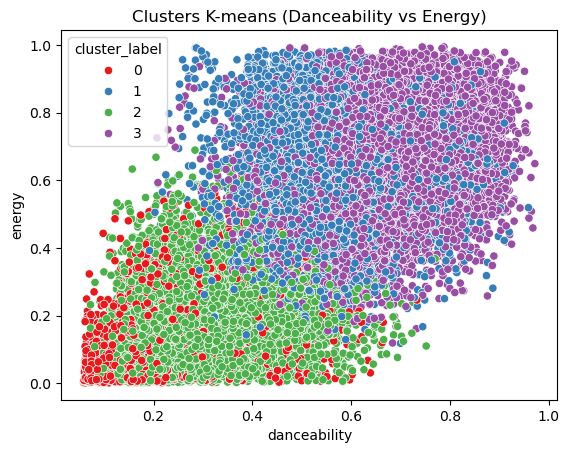

In [65]:
# Visualisation des groupes
sns.scatterplot(data=df, x='danceability', y='energy', hue='cluster_label', palette='Set1')
plt.title("Clusters K-means (Danceability vs Energy)")
plt.show()

In [70]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage

# Charger et nettoyer les données
df = pd.read_csv('spotify.csv').set_index('track_id').dropna()

# Réduire la taille du dataset en échantillonnant 1000 lignes
df_sample = df.sample(n=1000, random_state=42)

# Sélectionner les colonnes numériques
df_numeric = df_sample.select_dtypes(include=[np.number])

# Normaliser les données
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_numeric)

# Calcul de la matrice de similarité/dissimilarité avec la méthode de Ward
linkage_matrix = linkage(df_normalized, method='ward', metric='euclidean')

# Afficher un aperçu de la matrice de linkage
print("Matrice de linkage (premières lignes) :")
print(linkage_matrix[:5])

Matrice de linkage (premières lignes) :
[[3.48000000e+02 8.67000000e+02 3.98658796e-01 2.00000000e+00]
 [9.40000000e+01 9.49000000e+02 4.21355714e-01 2.00000000e+00]
 [3.12000000e+02 6.57000000e+02 4.31322482e-01 2.00000000e+00]
 [4.81000000e+02 7.94000000e+02 4.34848560e-01 2.00000000e+00]
 [4.30000000e+01 1.34000000e+02 4.41484146e-01 2.00000000e+00]]


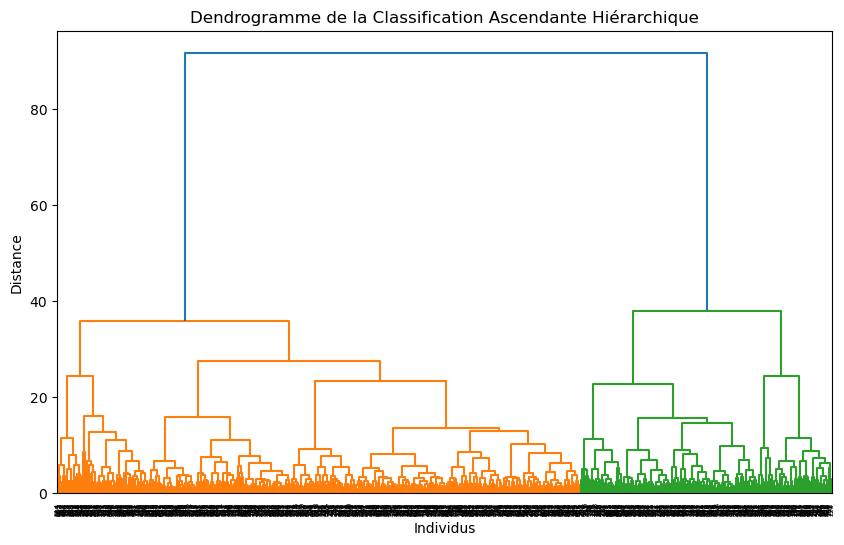

In [71]:
# Affichage du dendrogramme
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogramme de la Classification Ascendante Hiérarchique')
plt.xlabel('Individus')
plt.ylabel('Distance')
plt.show()

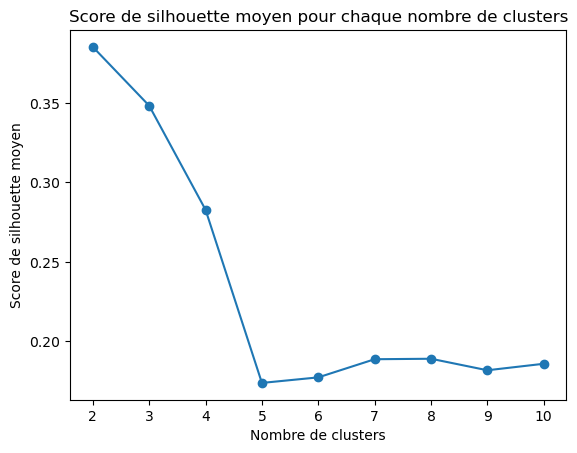

Nombre optimal de clusters : 2


In [72]:
# Effectuer la CAH avec différentes coupes du dendrogramme
max_clusters = 10  # Nombre maximal de clusters à considérer
silhouette_scores = []

for num_clusters in range(2, max_clusters+1):
    clusters = fcluster(linkage(df_normalized, method='ward', metric='euclidean'), num_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(df_normalized, clusters)
    silhouette_scores.append(silhouette_avg)

# Tracer le graphique du score de silhouette moyen pour chaque nombre de clusters
plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
plt.title("Score de silhouette moyen pour chaque nombre de clusters")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de silhouette moyen")
plt.show()

# Trouver le nombre optimal de clusters qui maximise le score de silhouette moyen
optimal_num_clusters = np.argmax(silhouette_scores) + 2  # +2 car on commence à 2 clusters
print("Nombre optimal de clusters :", optimal_num_clusters)

In [74]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster

# Charger et nettoyer les données
df = pd.read_csv('spotify.csv').set_index('track_id').dropna()

# Réduire la taille du dataset en échantillonnant 1000 lignes
df_sample = df.sample(n=1000, random_state=42)

# Sélectionner les colonnes numériques
df_numeric = df_sample.select_dtypes(include=[np.number])

# Normaliser les données
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_numeric)

# Calcul de la matrice de similarité/dissimilarité avec la méthode de Ward
linkage_matrix = linkage(df_normalized, method='ward', metric='euclidean')

# Demander à l'utilisateur de choisir le nombre de clusters
num_clusters = 2  # Ajustable selon les besoins

# Effectuer la CAH avec le nombre de clusters choisi
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Ajouter les informations de cluster dans le DataFrame
df_sample['Cluster'] = clusters

# Afficher le DataFrame avec les clusters
print(df_sample.head())

                            genre        artist_name  \
track_id                                               
3EyixzHY3pQOGJH1spPKRv    Country  Russell Dickerson   
2jhH85kKkAmPFcOuoUZRb2  Reggaeton           Anonimus   
4rXt1tYHZIavECuN32fk96    Country          Guy Clark   
6yBJ6zx5elF2QlNMvctVhq      Opera    Giacomo Puccini   
6Km4ylmxxmTbjmxdKLQWr7      Opera     Charles Gounod   

                                                               track_name  \
track_id                                                                    
3EyixzHY3pQOGJH1spPKRv                                           Billions   
2jhH85kKkAmPFcOuoUZRb2                     Cositas Nuevas (feat. Farruko)   
4rXt1tYHZIavECuN32fk96                                       Dublin Blues   
6yBJ6zx5elF2QlNMvctVhq         Madama Butterfly / Act 1: Vieni, amor mio!   
6Km4ylmxxmTbjmxdKLQWr7  Gounod: Roméo et Juliette, CG 9, Act 3: "Depui...   

                        popularity  acousticness  danceability  dur

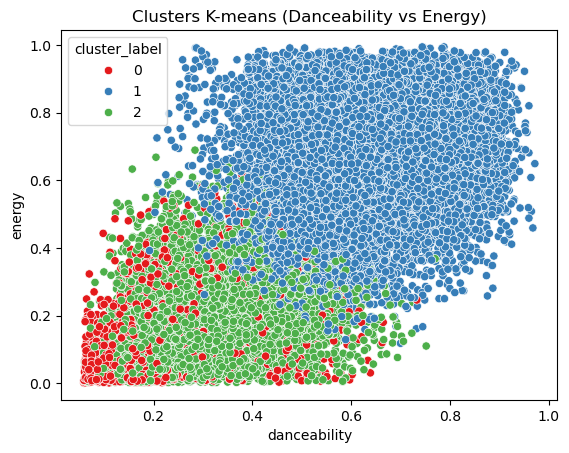

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Charger et nettoyer les données
df = pd.read_csv('spotify.csv').set_index('track_id').dropna()

# Sélectionner les colonnes numériques
df_numeric = df.select_dtypes(include=[np.number])

# Normaliser les données
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_numeric)

# Appliquer KMeans pour générer les clusters (k=3 par défaut, ajustable)
kmeanModel = KMeans(n_clusters=3, random_state=42)
df['cluster_label'] = kmeanModel.fit_predict(df_normalized)

# Visualisation des groupes
sns.scatterplot(data=df, x='danceability', y='energy', hue='cluster_label', palette='Set1')
plt.title("Clusters K-means (Danceability vs Energy)")
plt.show()

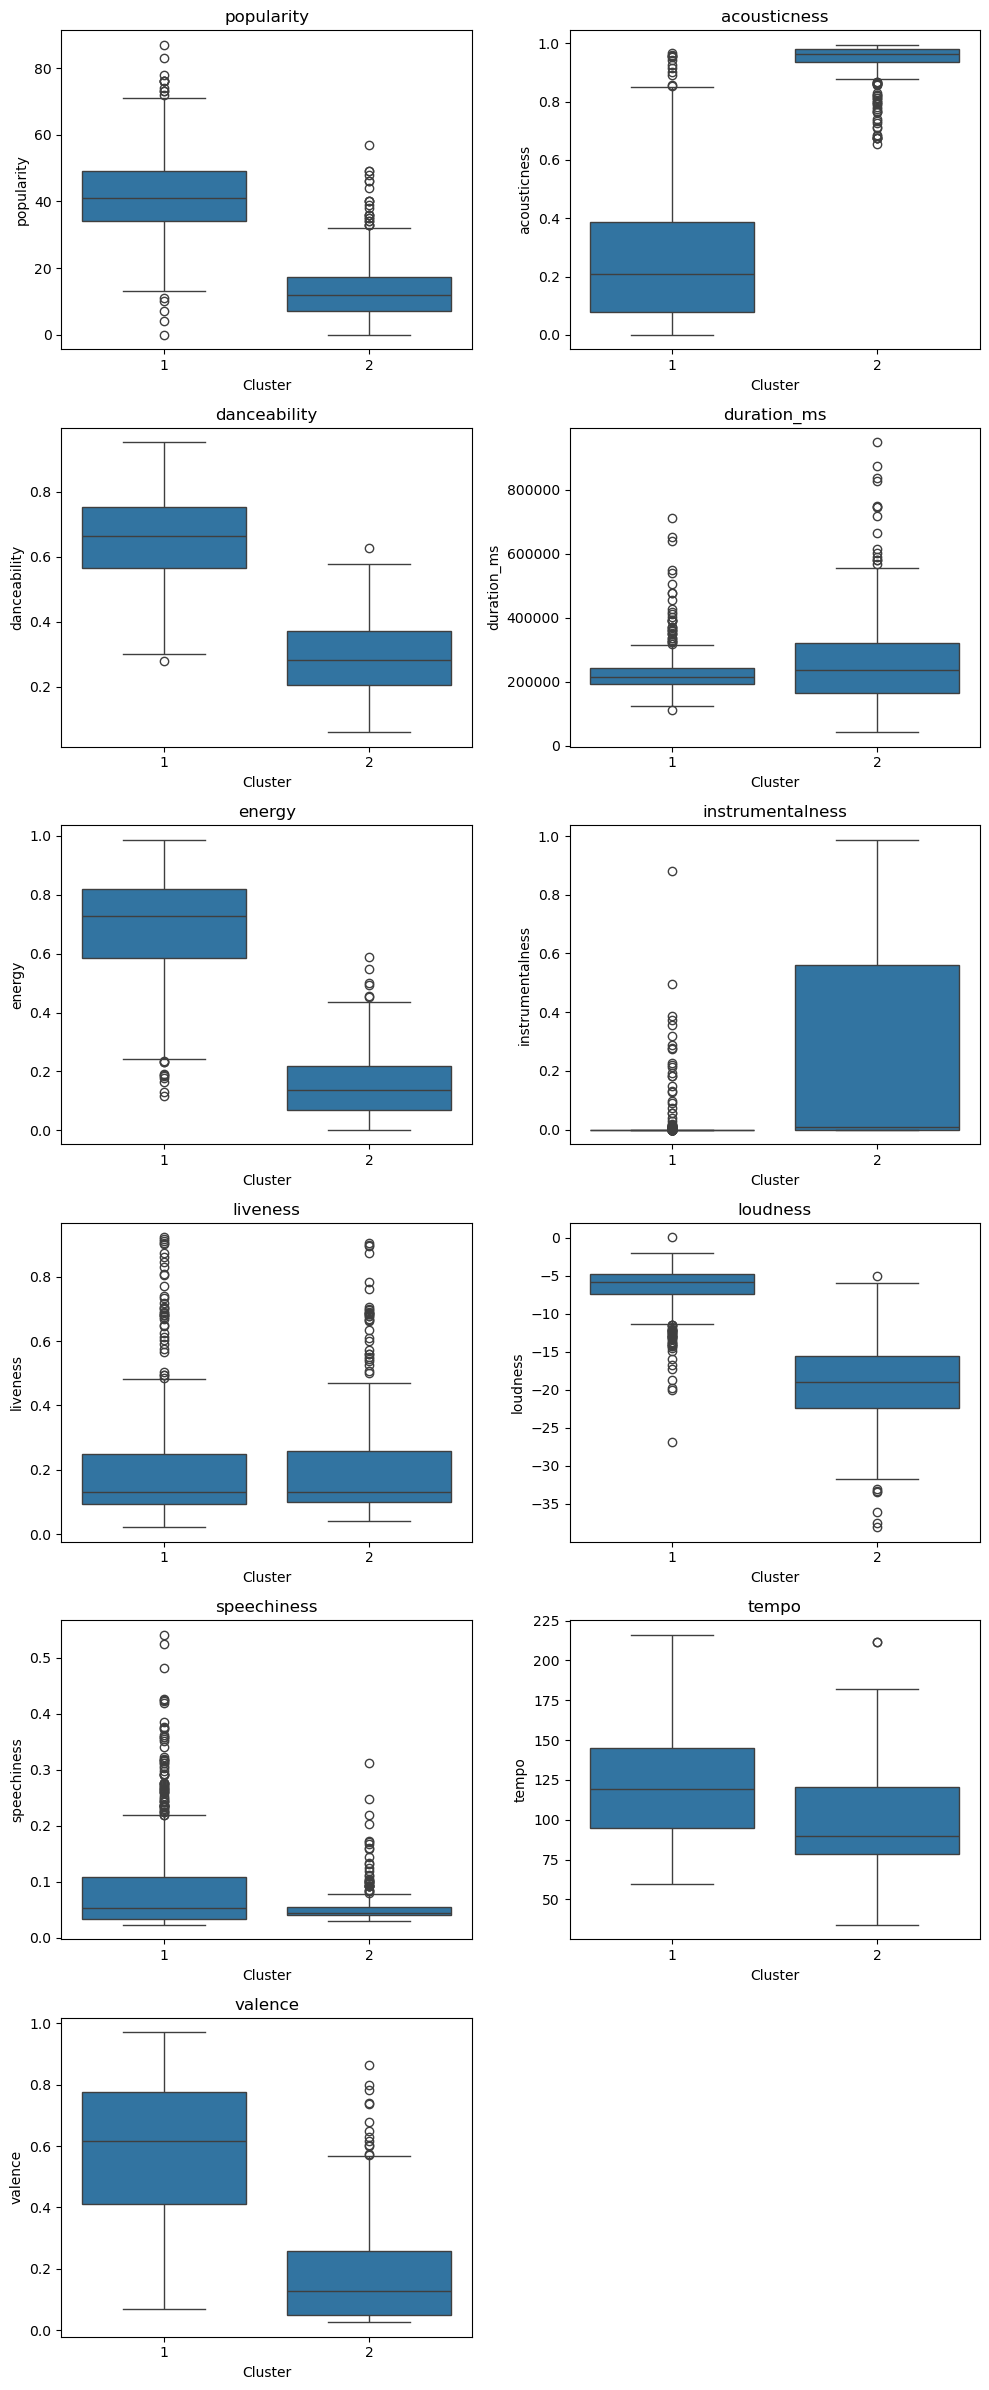

In [78]:
# Créer un boxplot pour chaque colonne numérique
num_cols = len(df_numeric.columns)
num_rows = num_cols // 2
if num_cols % 2:
    num_rows += 1

plt.figure(figsize=(10, 4 * num_rows))
for i, column in enumerate(df_numeric.columns, start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x='Cluster', y=column, data=df_sample)
    plt.title(column)

plt.tight_layout()
plt.show()

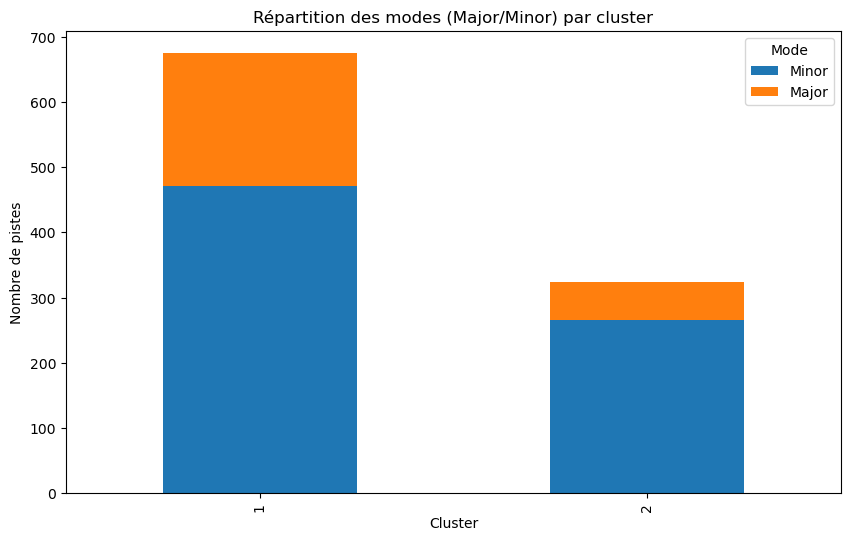


Tableau de contingence :
mode     Major  Minor
Cluster              
1          472    204
2          265     59


In [79]:
# Créer une table de contingence entre Cluster et mode
contingency_table = pd.crosstab(df_sample['Cluster'], df_sample['mode'])

# Tracer le barplot empilé
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Ajouter des étiquettes et des titres
plt.xlabel('Cluster')
plt.ylabel('Nombre de pistes')
plt.title('Répartition des modes (Major/Minor) par cluster')

# Afficher la légende
plt.legend(title='Mode', labels=['Minor', 'Major'])

# Afficher le graphique
plt.show()

# Afficher la table de contingence
print("\nTableau de contingence :")
print(contingency_table)

In [84]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster

# Charger et nettoyer les données
df = pd.read_csv('spotify.csv').set_index('track_id').dropna()

# Réduire la taille du dataset en échantillonnant 1000 lignes
df_sample = df.sample(n=1000, random_state=42)

# Sélectionner les colonnes numériques
df_numeric = df_sample.select_dtypes(include=[np.number])

# Normaliser les données
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_numeric)

# Calcul de la matrice de similarité/dissimilarité avec la méthode de Ward
linkage_matrix = linkage(df_normalized, method='ward', metric='euclidean')

# Définir le nombre de clusters
num_clusters = 2  # Ajustable selon les besoins

# Effectuer la CAH avec le nombre de clusters choisi
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Calculer le score de silhouette
silhouette_avg = silhouette_score(df_normalized, clusters)
print("Score de silhouette :", silhouette_avg)

Score de silhouette : 0.38546789712899177


In [85]:

# Instancier l'algorithme DBSCAN avec des valeurs d'epsilon et min_samples
dbscan = DBSCAN(eps=0.5, min_samples=50)

# Adapter le modèle aux données
dbscan.fit(df_normalized)

# Les étiquettes de cluster sont disponibles dans l'attribut 'labels_'
cluster_labels = dbscan.labels_

# Ajouter les labels au DataFrame
df_sample['Cluster'] = cluster_labels

# Afficher le DataFrame avec les clusters
print(df_sample.head())

                            genre        artist_name  \
track_id                                               
3EyixzHY3pQOGJH1spPKRv    Country  Russell Dickerson   
2jhH85kKkAmPFcOuoUZRb2  Reggaeton           Anonimus   
4rXt1tYHZIavECuN32fk96    Country          Guy Clark   
6yBJ6zx5elF2QlNMvctVhq      Opera    Giacomo Puccini   
6Km4ylmxxmTbjmxdKLQWr7      Opera     Charles Gounod   

                                                               track_name  \
track_id                                                                    
3EyixzHY3pQOGJH1spPKRv                                           Billions   
2jhH85kKkAmPFcOuoUZRb2                     Cositas Nuevas (feat. Farruko)   
4rXt1tYHZIavECuN32fk96                                       Dublin Blues   
6yBJ6zx5elF2QlNMvctVhq         Madama Butterfly / Act 1: Vieni, amor mio!   
6Km4ylmxxmTbjmxdKLQWr7  Gounod: Roméo et Juliette, CG 9, Act 3: "Depui...   

                        popularity  acousticness  danceability  dur

In [88]:
# Afficher les statistiques des clusters (moyennes des colonnes numériques)
cluster_stats = df_sample.groupby('Cluster')[df_numeric.columns].mean()

# Afficher le tableau des statistiques
print("Statistiques des clusters (moyennes des colonnes numériques) :")
print(cluster_stats)

Statistiques des clusters (moyennes des colonnes numériques) :
         popularity  acousticness  danceability  duration_ms    energy  \
Cluster                                                                  
-1           32.595       0.48048      0.537561   237370.968  0.519413   

         instrumentalness  liveness   loudness  speechiness       tempo  \
Cluster                                                                   
-1               0.085584   0.19957 -10.614303     0.078344  115.261347   

          valence  
Cluster            
-1       0.460121  


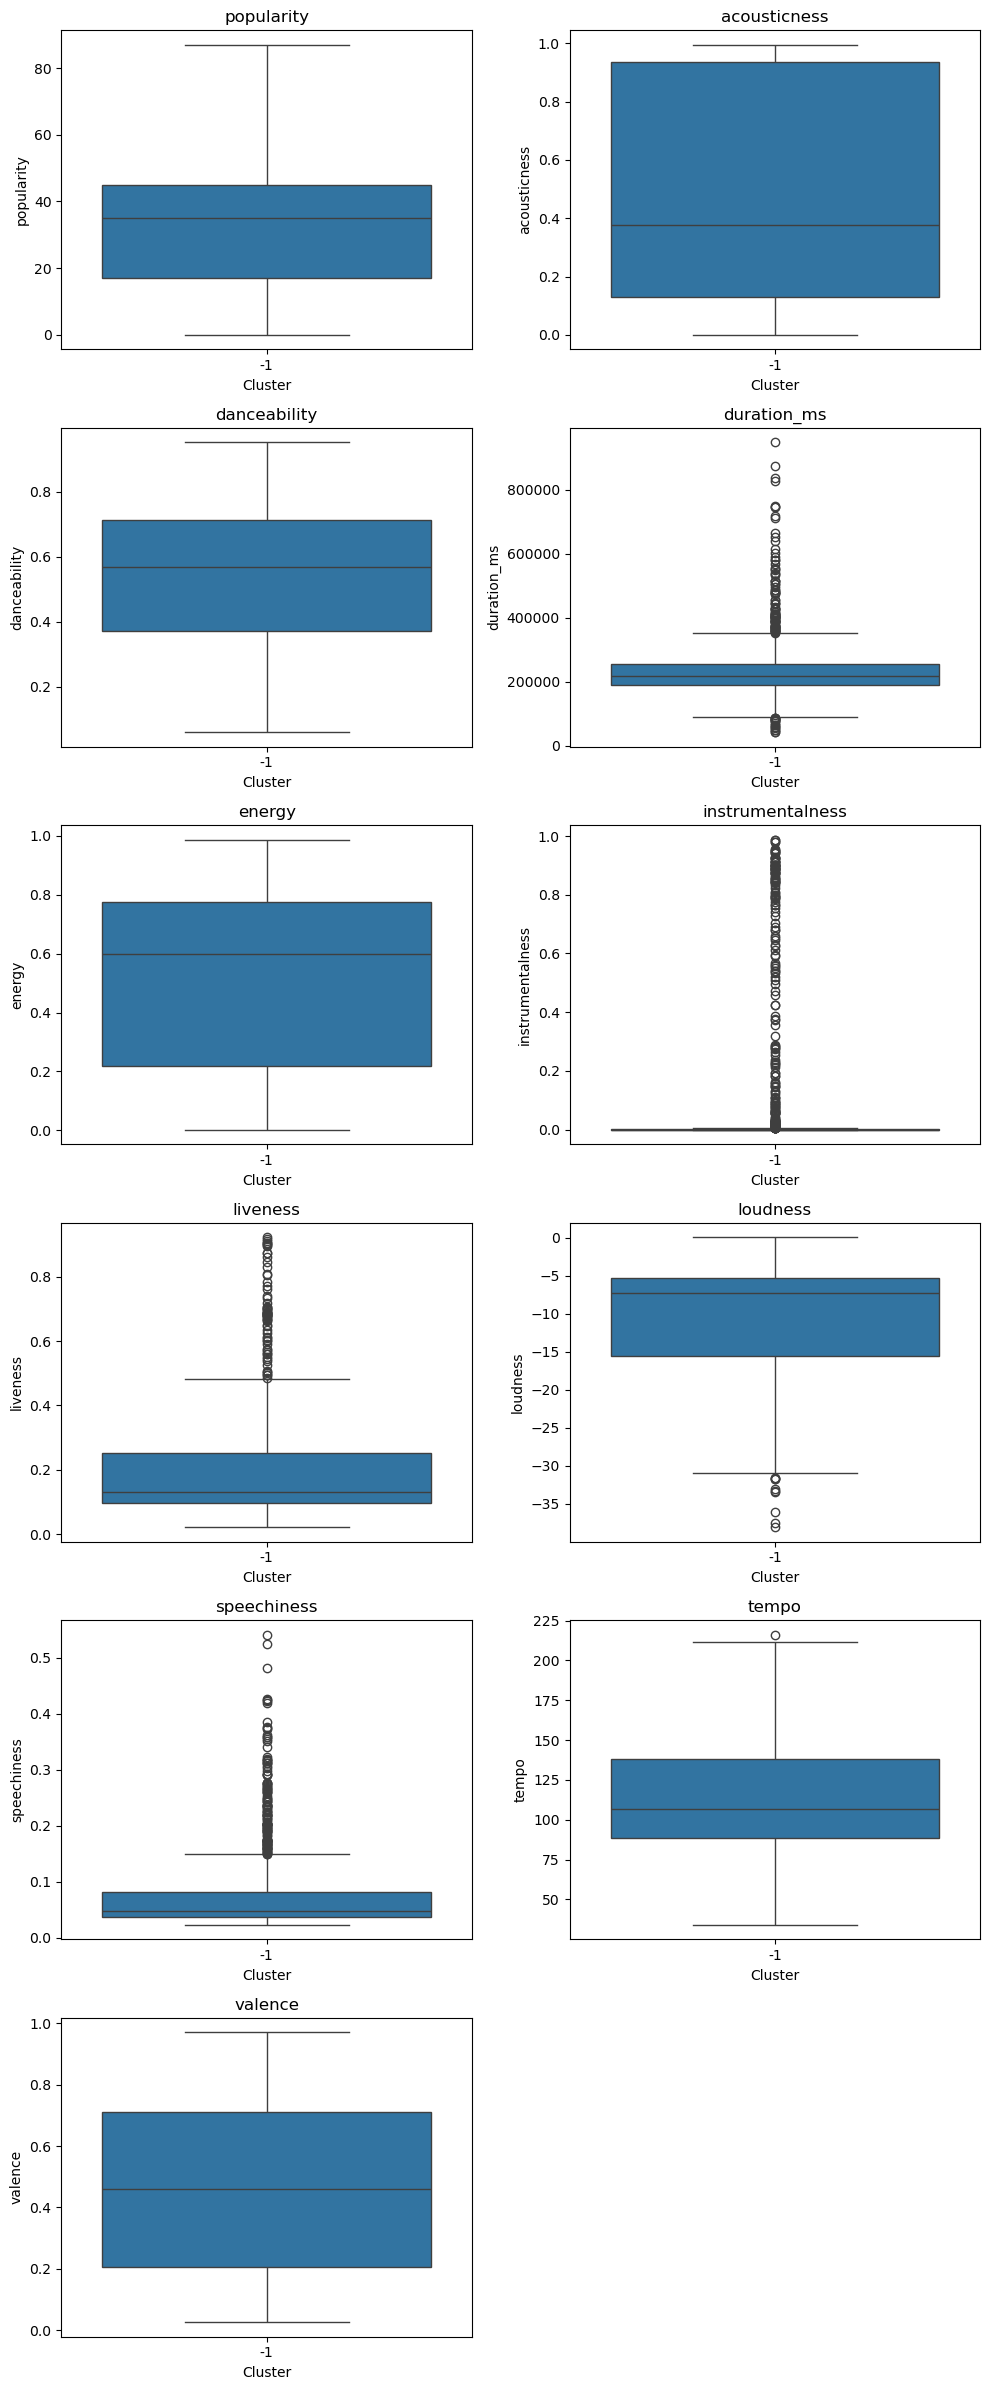

In [90]:

# Créer un boxplot pour chaque colonne numérique
num_cols = len(df_numeric.columns)
num_rows = num_cols // 2
if num_cols % 2:
    num_rows += 1

plt.figure(figsize=(10, 4 * num_rows))
for i, column in enumerate(df_numeric.columns, start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x='Cluster', y=column, data=df_sample)
    plt.title(column)

plt.tight_layout()
plt.show()

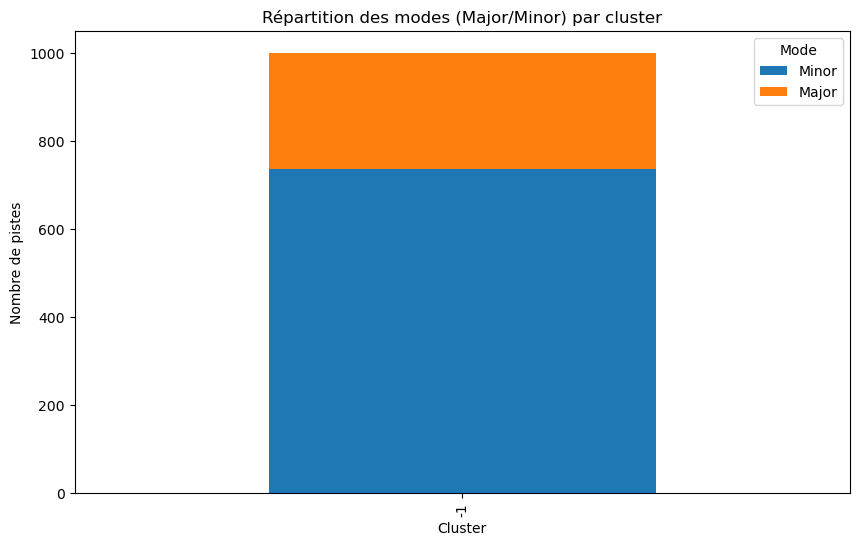


Tableau de contingence :
mode     Major  Minor
Cluster              
-1         737    263


In [91]:
# Créer une table de contingence entre Cluster et mode
contingency_table = pd.crosstab(df_sample['Cluster'], df_sample['mode'])

# Tracer le barplot empilé
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Ajouter des étiquettes et des titres
plt.xlabel('Cluster')
plt.ylabel('Nombre de pistes')
plt.title('Répartition des modes (Major/Minor) par cluster')

# Afficher la légende
plt.legend(title='Mode', labels=['Minor', 'Major'])

# Afficher le graphique
plt.show()

# Afficher la table de contingence
print("\nTableau de contingence :")
print(contingency_table)

In [94]:
# Calculer le score de silhouette (si au moins 2 clusters sont formés)
if len(np.unique(cluster_labels)) > 1:
    silhouette_avg = silhouette_score(df_normalized, cluster_labels)
    print("Score de silhouette :", silhouette_avg)
else:
    print("Score de silhouette non calculable : un seul cluster ou trop de bruit.")

Score de silhouette non calculable : un seul cluster ou trop de bruit.


In [96]:

# Calculer le nombre de clusters uniques
num_unique_clusters = len(df_sample['Cluster'].unique())

# Afficher le résultat
print("Nombre de clusters uniques (y compris le bruit) :", num_unique_clusters)

Nombre de clusters uniques (y compris le bruit) : 1


In [97]:

# Dictionnaire pour stocker les scores de silhouette
dict_silhouette_scores = {}

# Effectuer le DBSCAN avec différentes valeurs de epsilon et min_samples
for ep in np.arange(0.4, 0.8, 0.25):
    for min_s in range(30, 80):
        # Instancier l'algorithme DBSCAN
        dbscan = DBSCAN(eps=ep, min_samples=min_s)
        
        # Adapter le modèle aux données
        dbscan.fit(df_normalized)
        
        # Les étiquettes de cluster
        cluster_labels = dbscan.labels_
        
        # Calculer le score de silhouette si au moins 2 clusters sont formés
        if len(np.unique(cluster_labels)) > 1:
            silhouette_avg = silhouette_score(df_normalized, cluster_labels)
            dict_silhouette_scores[f"(eps={ep}, min_samples={min_s})"] = silhouette_avg
        else:
            dict_silhouette_scores[f"(eps={ep}, min_samples={min_s})"] = np.nan  # Non calculable

# Afficher les scores de silhouette
print("Scores de silhouette pour chaque combinaison (eps, min_samples) :")
for params, score in dict_silhouette_scores.items():
    print(f"{params}: {score:.4f}" if not np.isnan(score) else f"{params}: Non calculable (un seul cluster ou trop de bruit)")

Scores de silhouette pour chaque combinaison (eps, min_samples) :
(eps=0.4, min_samples=30): Non calculable (un seul cluster ou trop de bruit)
(eps=0.4, min_samples=31): Non calculable (un seul cluster ou trop de bruit)
(eps=0.4, min_samples=32): Non calculable (un seul cluster ou trop de bruit)
(eps=0.4, min_samples=33): Non calculable (un seul cluster ou trop de bruit)
(eps=0.4, min_samples=34): Non calculable (un seul cluster ou trop de bruit)
(eps=0.4, min_samples=35): Non calculable (un seul cluster ou trop de bruit)
(eps=0.4, min_samples=36): Non calculable (un seul cluster ou trop de bruit)
(eps=0.4, min_samples=37): Non calculable (un seul cluster ou trop de bruit)
(eps=0.4, min_samples=38): Non calculable (un seul cluster ou trop de bruit)
(eps=0.4, min_samples=39): Non calculable (un seul cluster ou trop de bruit)
(eps=0.4, min_samples=40): Non calculable (un seul cluster ou trop de bruit)
(eps=0.4, min_samples=41): Non calculable (un seul cluster ou trop de bruit)
(eps=0.4, 

In [101]:
dict_silhouette_scores

{'(eps=0.4, min_samples=30)': nan,
 '(eps=0.4, min_samples=31)': nan,
 '(eps=0.4, min_samples=32)': nan,
 '(eps=0.4, min_samples=33)': nan,
 '(eps=0.4, min_samples=34)': nan,
 '(eps=0.4, min_samples=35)': nan,
 '(eps=0.4, min_samples=36)': nan,
 '(eps=0.4, min_samples=37)': nan,
 '(eps=0.4, min_samples=38)': nan,
 '(eps=0.4, min_samples=39)': nan,
 '(eps=0.4, min_samples=40)': nan,
 '(eps=0.4, min_samples=41)': nan,
 '(eps=0.4, min_samples=42)': nan,
 '(eps=0.4, min_samples=43)': nan,
 '(eps=0.4, min_samples=44)': nan,
 '(eps=0.4, min_samples=45)': nan,
 '(eps=0.4, min_samples=46)': nan,
 '(eps=0.4, min_samples=47)': nan,
 '(eps=0.4, min_samples=48)': nan,
 '(eps=0.4, min_samples=49)': nan,
 '(eps=0.4, min_samples=50)': nan,
 '(eps=0.4, min_samples=51)': nan,
 '(eps=0.4, min_samples=52)': nan,
 '(eps=0.4, min_samples=53)': nan,
 '(eps=0.4, min_samples=54)': nan,
 '(eps=0.4, min_samples=55)': nan,
 '(eps=0.4, min_samples=56)': nan,
 '(eps=0.4, min_samples=57)': nan,
 '(eps=0.4, min_samp

In [103]:
 
        # Calculer le score de silhouette si au moins 2 clusters sont formés
        if len(np.unique(cluster_labels)) > 1:
            silhouette_avg = silhouette_score(df_normalized, cluster_labels)
            dict_silhouette_scores[f"(eps={ep}, min_samples={min_s})"] = silhouette_avg
        else:
            dict_silhouette_scores[f"(eps={ep}, min_samples={min_s})"] = np.nan

# Créer un DataFrame à partir du dictionnaire des scores
df_sil = pd.DataFrame(dict_silhouette_scores, index=['silhouette_score'])

# Transposer le DataFrame
df_sil = df_sil.T

# Afficher le DataFrame
print("DataFrame des scores de silhouette :")
print(df_sil)

DataFrame des scores de silhouette :
                            silhouette_score
(eps=0.4, min_samples=30)                NaN
(eps=0.4, min_samples=31)                NaN
(eps=0.4, min_samples=32)                NaN
(eps=0.4, min_samples=33)                NaN
(eps=0.4, min_samples=34)                NaN
...                                      ...
(eps=0.65, min_samples=75)               NaN
(eps=0.65, min_samples=76)               NaN
(eps=0.65, min_samples=77)               NaN
(eps=0.65, min_samples=78)               NaN
(eps=0.65, min_samples=79)               NaN

[100 rows x 1 columns]


In [104]:
df_sil

silhouette_score
(eps=0.4, min_samples=30)                NaN
(eps=0.4, min_samples=31)                NaN
(eps=0.4, min_samples=32)                NaN
(eps=0.4, min_samples=33)                NaN
(eps=0.4, min_samples=34)                NaN
...                                      ...
(eps=0.65, min_samples=75)               NaN
(eps=0.65, min_samples=76)               NaN
(eps=0.65, min_samples=77)               NaN
(eps=0.65, min_samples=78)               NaN
(eps=0.65, min_samples=79)               NaN

[100 rows x 1 columns]

In [105]:
df_sil=df_sil.set_axis(['score_sil'], axis = 1) 
df_sil

score_sil
(eps=0.4, min_samples=30)         NaN
(eps=0.4, min_samples=31)         NaN
(eps=0.4, min_samples=32)         NaN
(eps=0.4, min_samples=33)         NaN
(eps=0.4, min_samples=34)         NaN
...                               ...
(eps=0.65, min_samples=75)        NaN
(eps=0.65, min_samples=76)        NaN
(eps=0.65, min_samples=77)        NaN
(eps=0.65, min_samples=78)        NaN
(eps=0.65, min_samples=79)        NaN

[100 rows x 1 columns]

In [110]:
# Créer un DataFrame à partir du dictionnaire des scores
df_sil = pd.DataFrame(dict_silhouette_scores, index=['silhouette_score'])

# Transposer le DataFrame
df_sil = df_sil.T

# Renommer la colonne en 'score_sil'
df_sil = df_sil.set_axis(['score_sil'], axis=1)

# Trouver le score de silhouette maximal
max_silhouette_score = df_sil['score_sil'].max()

# Afficher le score maximal
print("Score de silhouette maximal :", max_silhouette_score)

Score de silhouette maximal : nan


In [107]:
df_sil[df_sil['score_sil']==df_sil['score_sil'].max()]

Empty DataFrame
Columns: [score_sil]
Index: []